In [1]:
import preprocessing_step
import training_step
import prediction_step
import validation_step

from preprocessing_step import *
from training_step import *
from prediction_step import *
from validation_step import *

In [2]:
import importlib
def reload_import():
    # Reload the modules
    importlib.reload(preprocessing_step)
    importlib.reload(training_step)
    importlib.reload(prediction_step)
    importlib.reload(validation_step)

reload_import()

## Load Data

### Load data from google sheet from google colab

In [2]:
#Import data from google sheet

# 1. Authorizing
from google.colab import auth
auth.authenticate_user()

# 2. Credentials
import gspread
from google.auth import default
creds, _ = default()

# 3. Authorizing Credentials
gc = gspread.authorize(creds)

# 4. Importing Google Sheet using google sheet key
docSheet = gc.open_by_key('1sshI9mIlyuSJdbuS4KDXzvLR_K95y-rLaUgTvoHihd0')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_records(docSheet.sheet1.get_all_values(), )
df

### Load data from excel from local

In [ ]:
# import from file xlsx

import pandas as pd

df = pd.read_excel('data/data_osa.xlsx')
df = df.drop(columns=df.columns[17:26])
df = pd.concat([pd.DataFrame(data=[df.columns.tolist()], columns=df.columns) , df])
df.columns = [i for i in range(0, 17)]
df = df.astype(str)
df = df.replace({"nan": "", "Unnamed: .*": ""}, regex=True)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,No,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali),,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai,,,,Label (OSA)
0,,,,,,,,,buang air kecil,tersedak,,,Diabetes,Hipertensi,Hyperkolesterol,Lainnya,
1,Example,,53.0,164.0,85.0,115.0,41.0,Keras,3,2,5.0,Sedikit Menggangu,True,True,False,,
2,1,Laki-laki,59.0,176.0,110.0,130.0,39.0,Keras,3,5,6.0,Sedikit Menggangu,True,True,True,,Berat
3,2,Perempuan,27.0,154.0,119.0,140.0,45.0,Keras,2,2,6.0,Sedikit Menggangu,True,True,True,,Berat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,994,,,,,,,,,,,,False,False,False,,
997,995,,,,,,,,,,,,False,False,False,,
998,996,,,,,,,,,,,,False,False,False,,
999,997,,,,,,,,,,,,False,False,False,,


### Load data from google sheet from local

In [3]:
df = load_gsheet('1sshI9mIlyuSJdbuS4KDXzvLR_K95y-rLaUgTvoHihd0')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,No,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali),,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai,,,,Label (OSA)
1,,,,,,,,,buang air kecil,tersedak,,,Diabetes,Hipertensi,Hyperkolesterol,Lainnya,
2,Example,,53,164,85,115,41,Keras,3,2,5,Sedikit Menggangu,TRUE,TRUE,FALSE,,
3,1,Laki-laki,59,176,110,130,39,Keras,3,5,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
4,2,Perempuan,27,154,119,140,45,Keras,2,2,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,994,,,,,,,,,,,,FALSE,FALSE,FALSE,,
998,995,,,,,,,,,,,,FALSE,FALSE,FALSE,,
999,996,,,,,,,,,,,,FALSE,FALSE,FALSE,,
1000,997,,,,,,,,,,,,FALSE,FALSE,FALSE,,


### Update Columns Name

In [4]:
#get column name

row0 = df.iloc[[0]].values.tolist()[0]
row1 = df.iloc[[1]].values.tolist()[0]

col_name = []
pre = row0[0]

for i in range(df.iloc[[0]].size):

  pre = row0[i] if row0[i] != "" else pre               #update pre if current row0 value not empty
  post = ": " + row1[i] if row1[i] != "" else ""               #update pre if current row0 value not empty

  col_name.append(pre + post)

print(col_name)

['No', 'Jenis Kelamin', 'Usia (thn)', 'Tinggi (cm)', 'Berat (Kg)', 'Lingkar Perut (cm)', 'Lingkar Leher (cm)', 'Suara Mengorok', 'Terbangun (berapa kali): buang air kecil', 'Terbangun (berapa kali): tersedak', 'Durasi tidur (jam)', 'Ngantuk saat beraktifitas', 'Kondisi yang menyertai: Diabetes', 'Kondisi yang menyertai: Hipertensi', 'Kondisi yang menyertai: Hyperkolesterol', 'Kondisi yang menyertai: Lainnya', 'Label (OSA)']


In [5]:
#reset column name

df = df.set_axis(col_name, axis='columns')
df = df.drop([0, 1, 2])
df = df.reset_index()
df = df.drop(columns=['index', 'No'])

df

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59,176,110,130,39,Keras,3,5,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27,154,119,140,45,Keras,2,2,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37,179,90,104,35,Pelan,1,2,6,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39,167,104,120,42,Keras,3,5,6,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52,170,90,99,36,Pelan,0,0,6,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,,,,,,,,,,,,FALSE,FALSE,FALSE,,
995,,,,,,,,,,,,FALSE,FALSE,FALSE,,
996,,,,,,,,,,,,FALSE,FALSE,FALSE,,
997,,,,,,,,,,,,FALSE,FALSE,FALSE,,


### Convert numerical data from string to int

In [6]:
#list of numerical column
numerical_column = ['Usia (thn)', 'Tinggi (cm)', 'Berat (Kg)', 'Lingkar Perut (cm)', 'Lingkar Leher (cm)', 'Terbangun (berapa kali): buang air kecil', 'Terbangun (berapa kali): tersedak', 'Durasi tidur (jam)']

In [7]:
#convert numerical column to int
df[numerical_column] = df[numerical_column].apply(pd.to_numeric)

In [8]:
#add BMI column
df.insert(4, 'BMI (Kg/m2)', pd.Series(0))
numerical_column.insert(3, 'BMI (Kg/m2)')
df['BMI (Kg/m2)'] = df['Berat (Kg)'] / (df['Tinggi (cm)'] / 100) ** 2
df

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59.0,176.0,110.0,35.511364,130.0,39.0,Keras,3.0,5.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27.0,154.0,119.0,50.177096,140.0,45.0,Keras,2.0,2.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37.0,179.0,90.0,28.089011,104.0,35.0,Pelan,1.0,2.0,6.0,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39.0,167.0,104.0,37.290688,120.0,42.0,Keras,3.0,5.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52.0,170.0,90.0,31.141869,99.0,36.0,Pelan,0.0,0.0,6.0,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,
995,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,
996,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,
997,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,


In [9]:
#drop NA row
df = df.dropna()
df

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59.0,176.0,110.0,35.511364,130.0,39.0,Keras,3.0,5.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27.0,154.0,119.0,50.177096,140.0,45.0,Keras,2.0,2.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37.0,179.0,90.0,28.089011,104.0,35.0,Pelan,1.0,2.0,6.0,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39.0,167.0,104.0,37.290688,120.0,42.0,Keras,3.0,5.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52.0,170.0,90.0,31.141869,99.0,36.0,Pelan,0.0,0.0,6.0,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Perempuan,52.0,162.0,122.0,46.486816,134.0,42.0,Keras,2.0,3.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat
400,Perempuan,39.0,156.0,103.0,42.324129,108.0,40.0,Keras,1.0,4.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
401,Laki-laki,48.0,176.0,143.0,46.164773,135.0,46.0,Keras,2.0,3.0,7.0,Sangat Menganggu,FALSE,TRUE,TRUE,,Berat
402,Perempuan,53.0,159.0,90.0,35.599858,116.0,38.0,Keras,1.0,4.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat


In [10]:
create_empty_stats_table(numerical_column)

,MIN,MAX,AVG,STD
Usia (thn),0.0,0.0,0.0,0.0
Tinggi (cm),0.0,0.0,0.0,0.0
Berat (Kg),0.0,0.0,0.0,0.0
BMI (Kg/m2),0.0,0.0,0.0,0.0
Lingkar Perut (cm),0.0,0.0,0.0,0.0
Lingkar Leher (cm),0.0,0.0,0.0,0.0
Terbangun (berapa kali): buang air kecil,0.0,0.0,0.0,0.0
Terbangun (berapa kali): tersedak,0.0,0.0,0.0,0.0
Durasi tidur (jam),0.0,0.0,0.0,0.0


In [11]:
generate_stats_table(df, numerical_column)

File renamed from d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx to d:\Petra\Semester 8\screening_sleep_apnea_ai\data\2024-07-09 03-20-06 stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx


,MIN,MAX,AVG,STD
Usia (thn),1.000000,84.000000,44.766749,17.663386
Tinggi (cm),65.000000,185.000000,164.535980,12.519858
Berat (Kg),9.000000,160.000000,80.094541,22.732921
BMI (Kg/m2),9.036861,178.813943,29.422576,10.173510
Lingkar Perut (cm),40.000000,160.000000,95.717122,18.256039
Lingkar Leher (cm),15.000000,48.000000,36.523573,4.441585
Terbangun (berapa kali): buang air kecil,0.000000,3.000000,0.692308,0.810144
Terbangun (berapa kali): tersedak,0.000000,6.000000,1.756824,1.798402
Durasi tidur (jam),5.000000,9.000000,6.173697,0.676252


## Prepocessing Dataset

In [12]:
df_prep = df.copy()
df_prep

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59.0,176.0,110.0,35.511364,130.0,39.0,Keras,3.0,5.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27.0,154.0,119.0,50.177096,140.0,45.0,Keras,2.0,2.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37.0,179.0,90.0,28.089011,104.0,35.0,Pelan,1.0,2.0,6.0,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39.0,167.0,104.0,37.290688,120.0,42.0,Keras,3.0,5.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52.0,170.0,90.0,31.141869,99.0,36.0,Pelan,0.0,0.0,6.0,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Perempuan,52.0,162.0,122.0,46.486816,134.0,42.0,Keras,2.0,3.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat
400,Perempuan,39.0,156.0,103.0,42.324129,108.0,40.0,Keras,1.0,4.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
401,Laki-laki,48.0,176.0,143.0,46.164773,135.0,46.0,Keras,2.0,3.0,7.0,Sangat Menganggu,FALSE,TRUE,TRUE,,Berat
402,Perempuan,53.0,159.0,90.0,35.599858,116.0,38.0,Keras,1.0,4.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat


### Prepocessing Numerical Data

In [13]:
df_prep = numerical_prep(df_prep, numerical_column)
df_prep

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx


,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,0.698795,0.925000,0.668874,0.155937,0.750000,0.727273,Keras,1.000000,0.833333,0.25,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,0.313253,0.741667,0.728477,0.242319,0.833333,0.909091,Keras,0.666667,0.333333,0.25,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,0.433735,0.950000,0.536424,0.112219,0.533333,0.606061,Pelan,0.333333,0.333333,0.25,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,0.457831,0.850000,0.629139,0.166417,0.666667,0.818182,Keras,1.000000,0.833333,0.25,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,0.614458,0.875000,0.536424,0.130200,0.491667,0.636364,Pelan,0.000000,0.000000,0.25,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Perempuan,0.614458,0.808333,0.748344,0.220583,0.783333,0.818182,Keras,0.666667,0.500000,0.50,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat
400,Perempuan,0.457831,0.758333,0.622517,0.196065,0.566667,0.757576,Keras,0.333333,0.666667,0.25,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
401,Laki-laki,0.566265,0.925000,0.887417,0.218686,0.791667,0.939394,Keras,0.666667,0.500000,0.50,Sangat Menganggu,FALSE,TRUE,TRUE,,Berat
402,Perempuan,0.626506,0.783333,0.536424,0.156458,0.633333,0.696970,Keras,0.333333,0.666667,0.50,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat


### Preprocessing Categorical Data

In [14]:
df_prep = categorical_prep(df_prep)
df_prep

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,1,0.698795,0.925000,0.668874,0.155937,0.750000,0.727273,3,1.000000,0.833333,0.25,1,1,1,1,None,Berat
1,0,0.313253,0.741667,0.728477,0.242319,0.833333,0.909091,3,0.666667,0.333333,0.25,1,1,1,1,None,Berat
2,1,0.433735,0.950000,0.536424,0.112219,0.533333,0.606061,1,0.333333,0.333333,0.25,1,0,0,0,Pilek,Ringan
3,1,0.457831,0.850000,0.629139,0.166417,0.666667,0.818182,3,1.000000,0.833333,0.25,2,1,0,0,None,Berat
4,1,0.614458,0.875000,0.536424,0.130200,0.491667,0.636364,1,0.000000,0.000000,0.25,0,0,0,0,None,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0.614458,0.808333,0.748344,0.220583,0.783333,0.818182,3,0.666667,0.500000,0.50,2,1,1,1,None,Berat
400,0,0.457831,0.758333,0.622517,0.196065,0.566667,0.757576,3,0.333333,0.666667,0.25,2,1,0,0,None,Berat
401,1,0.566265,0.925000,0.887417,0.218686,0.791667,0.939394,3,0.666667,0.500000,0.50,2,0,1,1,None,Berat
402,0,0.626506,0.783333,0.536424,0.156458,0.633333,0.696970,3,0.333333,0.666667,0.50,2,1,1,1,None,Berat


In [15]:
df_prep['Kondisi yang menyertai: Lainnya'].unique()

array([None, 'Pilek', 'Amandel', 'Gerd', 'Rhintis Alergi',
       'Bibir Sumbing', 'Adenoid', 'Batuk', 'Polip', 'Hypertiroid',
       'Hamil', 'Autoimun'], dtype=object)

In [16]:
#one hot encoding
final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])
final_prep

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,...,Kondisi yang menyertai: Lainnya_Amandel,Kondisi yang menyertai: Lainnya_Autoimun,Kondisi yang menyertai: Lainnya_Batuk,Kondisi yang menyertai: Lainnya_Bibir Sumbing,Kondisi yang menyertai: Lainnya_Gerd,Kondisi yang menyertai: Lainnya_Hamil,Kondisi yang menyertai: Lainnya_Hypertiroid,Kondisi yang menyertai: Lainnya_Pilek,Kondisi yang menyertai: Lainnya_Polip,Kondisi yang menyertai: Lainnya_Rhintis Alergi
0,1,0.698795,0.925000,0.668874,0.155937,0.750000,0.727273,3,1.000000,0.833333,...,0,0,0,0,0,0,0,0,0,0
1,0,0.313253,0.741667,0.728477,0.242319,0.833333,0.909091,3,0.666667,0.333333,...,0,0,0,0,0,0,0,0,0,0
2,1,0.433735,0.950000,0.536424,0.112219,0.533333,0.606061,1,0.333333,0.333333,...,0,0,0,0,0,0,0,1,0,0
3,1,0.457831,0.850000,0.629139,0.166417,0.666667,0.818182,3,1.000000,0.833333,...,0,0,0,0,0,0,0,0,0,0
4,1,0.614458,0.875000,0.536424,0.130200,0.491667,0.636364,1,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0.614458,0.808333,0.748344,0.220583,0.783333,0.818182,3,0.666667,0.500000,...,0,0,0,0,0,0,0,0,0,0
400,0,0.457831,0.758333,0.622517,0.196065,0.566667,0.757576,3,0.333333,0.666667,...,0,0,0,0,0,0,0,0,0,0
401,1,0.566265,0.925000,0.887417,0.218686,0.791667,0.939394,3,0.666667,0.500000,...,0,0,0,0,0,0,0,0,0,0
402,0,0.626506,0.783333,0.536424,0.156458,0.633333,0.696970,3,0.333333,0.666667,...,0,0,0,0,0,0,0,0,0,0


## Training Models

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from joblib import dump, load

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their parameter grids
models_param_grid = {
    'SVM': (SVC(), {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10, 12]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'LogisticRegression': (LogisticRegression(max_iter=200), {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    })
}

# Loop through the models and perform GridSearchCV
for model_name, (model, param_grid) in models_param_grid.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # Save the best model
    dump(best_model, f"models/{model_name}_model.joblib")

    # Predictions and evaluation on the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}")
    print(f"Classification Report for {model_name}:\n{class_report}")
    print("\n" + "="*60 + "\n")


Training SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Accuracy for SVM: 0.8430
Confusion Matrix for SVM:
[[29  0  0  0]
 [ 0 23  2  0]
 [ 0  3 22  4]
 [ 3  0  7 28]]
Classification Report for SVM:
              precision    recall  f1-score   support

       Berat       0.91      1.00      0.95        29
      Normal       0.88      0.92      0.90        25
      Ringan       0.71      0.76      0.73        29
      Sedang       0.88      0.74      0.80        38

    accuracy                           0.84       121
   macro avg       0.84      0.85      0.85       121
weighted avg       0.84      0.84      0.84       121



Training RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters for RandomForest: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 50}
Accuracy for RandomForest: 0.8264
Confusion Matrix for RandomForest:
[[28  0  0  1]
 [ 0 21 

c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.metrics import make_scorer, f1_score

In [18]:
# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
train_models(X_train, y_train)

Training SVM...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
File renamed from models/SVM_model.joblib to models\2024-07-09 03-20-49 SVM_model.joblib
Training RandomForest...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for RandomForest: {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
File renamed from models/RandomForest_model.joblib to models\2024-07-09 03-21-04 RandomForest_model.joblib
Training KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
File renamed from models/KNN_model.joblib to models\2024-07-09 03-21-05 KNN_model.joblib
Training LogisticRegression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for LogisticRegression: {'C': 10, 'solver': 'newton-cg'}
File renamed from models/LogisticRegression_model.jobli

In [20]:
model_predict(model_name="SVM", processed_features=final_prep.drop(columns=['Label (OSA)']).iloc[6])

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


array(['Berat'], dtype=object)

## Validation

### With Testing Data

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


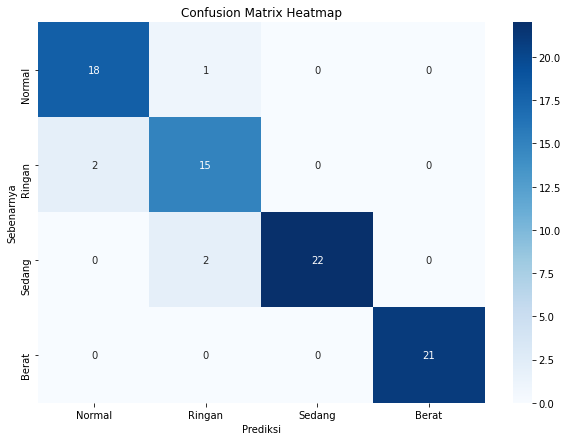

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.94,0.95,0.88,0.83,0.97,0.86
Sedang,0.98,1.00,0.92,1.00,0.97,0.96
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


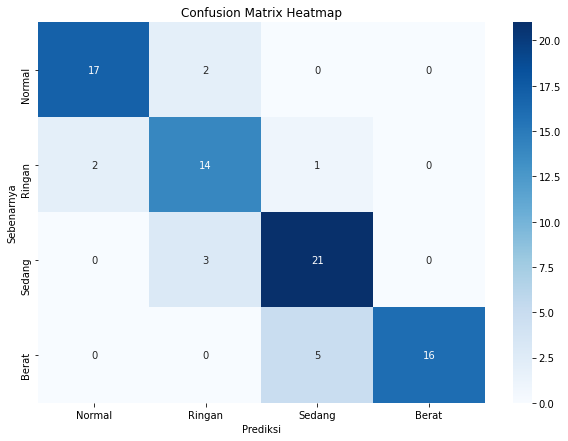

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.97,0.89,0.89,0.97,0.89
Ringan,0.90,0.92,0.82,0.74,0.95,0.78
Sedang,0.89,0.89,0.88,0.78,0.94,0.82
Berat,0.94,1.00,0.76,1.00,0.92,0.86


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


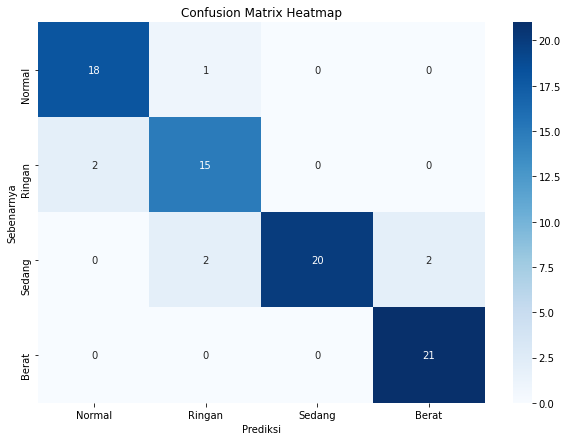

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.94,0.95,0.88,0.83,0.97,0.86
Sedang,0.95,1.00,0.83,1.00,0.93,0.91
Berat,0.98,0.97,1.00,0.91,1.00,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


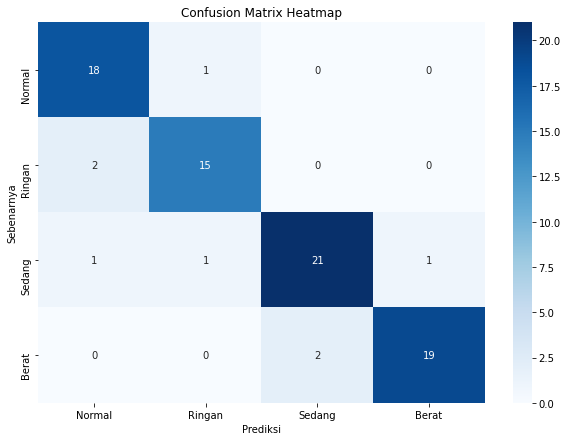

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.95,0.95,0.86,0.98,0.90
Ringan,0.95,0.97,0.88,0.88,0.97,0.88
Sedang,0.94,0.96,0.88,0.91,0.95,0.89
Berat,0.96,0.98,0.90,0.95,0.97,0.93


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.97,0.98,0.94,0.93,0.98,0.93
KNN,0.92,0.95,0.84,0.85,0.95,0.84
LogisticRegression,0.96,0.97,0.92,0.91,0.97,0.91
RandomForest,0.95,0.97,0.90,0.90,0.97,0.90


In [21]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_test, y_test, path_save='data/validation/normal')

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


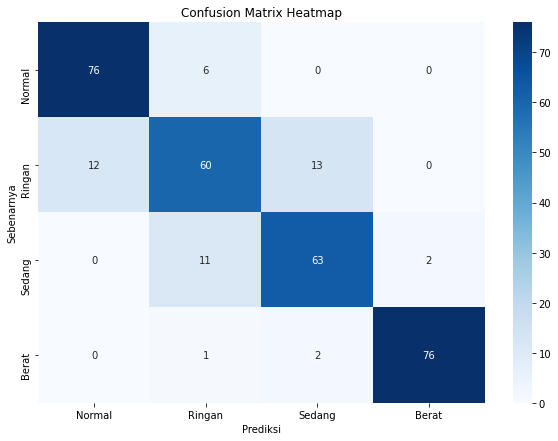

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.95,0.93,0.86,0.97,0.89
Ringan,0.87,0.92,0.71,0.77,0.90,0.74
Sedang,0.91,0.94,0.83,0.81,0.95,0.82
Berat,0.98,0.99,0.96,0.97,0.99,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


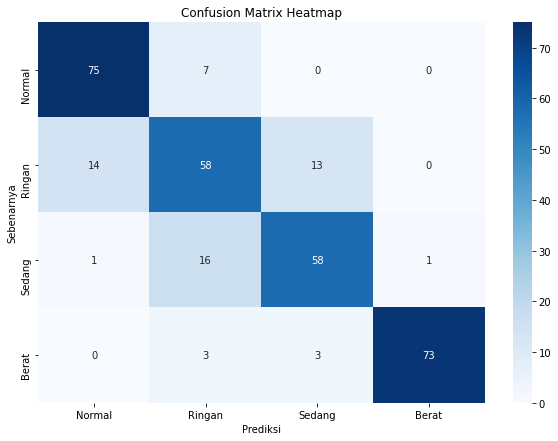

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.94,0.91,0.83,0.97,0.87
Ringan,0.84,0.89,0.68,0.69,0.89,0.69
Sedang,0.89,0.93,0.76,0.78,0.93,0.77
Berat,0.98,1.00,0.92,0.99,0.98,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


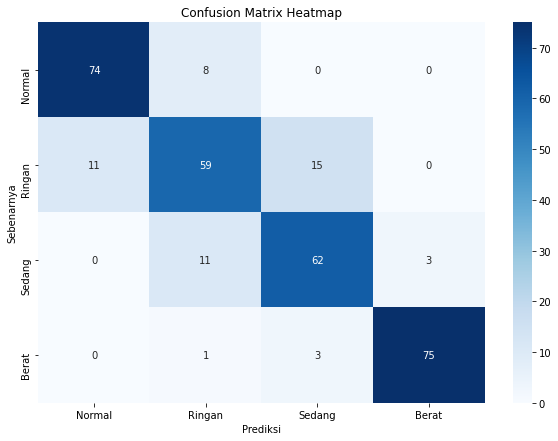

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.95,0.90,0.87,0.97,0.89
Ringan,0.86,0.92,0.69,0.75,0.89,0.72
Sedang,0.90,0.93,0.82,0.78,0.94,0.79
Berat,0.98,0.99,0.95,0.96,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


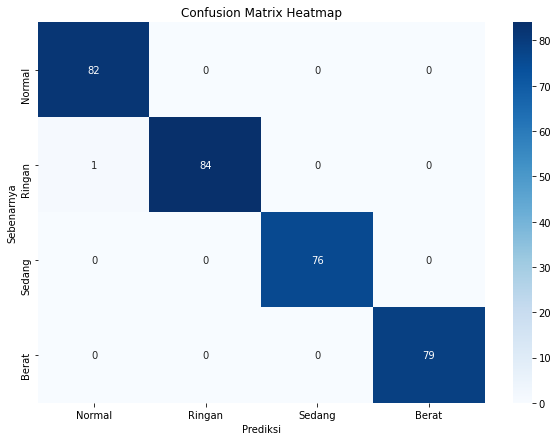

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.00,0.99,1.0,0.99
Ringan,1.0,1.0,0.99,1.00,1.0,0.99
Sedang,1.0,1.0,1.00,1.00,1.0,1.00
Berat,1.0,1.0,1.00,1.00,1.0,1.00


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.93,0.95,0.86,0.85,0.95,0.85
KNN,0.91,0.94,0.82,0.82,0.94,0.82
LogisticRegression,0.92,0.95,0.84,0.84,0.95,0.84
RandomForest,1.00,1.00,1.00,1.00,1.00,1.00


In [123]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_train, y_train)

### With new data

In [31]:
#Load data from sheet
# df_test = load_gsheet('1FgKnv6MiFAmfApPNuliSh6yKakAxLCCqgC2cbeJP0bc')
df_test = load_gsheet('1MSw27792kMZvgDBW0uGw6OH21tPRwhSwIIX4-9GDDXo')
df_test = df_test.drop([0, 1])

df_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2,1,6/1/2024 2:59:24,Perempuan,20,165,65,23.87511478,80,34,Normal (tidak mengorok),...,0,7,Sedikit Mengganggu,GERD,Normal,Normal,Normal,Normal,normal,Normal
3,2,6/1/2024 7:54:50,Laki-laki,22,160,53,20.703125,100,50,Sedang,...,0,6,Sedikit Mengganggu,,Ringan,Normal,Ringan,Ringan,ringan,Ringan
4,3,6/1/2024 8:15:48,Perempuan,42,164,59,21.93634741,72,29,Normal (tidak mengorok),...,0,6,Sedikit Mengganggu,,Normal,Normal,Normal,Normal,normal,Normal
5,4,6/1/2024 8:32:12,Perempuan,38,166,50,18.14486863,64,31,Pelan,...,0,7,Tidak Mengganggu,,Normal,Normal,Normal,Normal,normal,Normal
6,5,6/1/2024 8:32:24,Laki-laki,41,185,83,24.25127831,94,40,Normal (tidak mengorok),...,1,5,Tidak Mengganggu,,Normal,Normal,Ringan,Ringan,normal,Ringan
7,6,6/1/2024 8:38:20,Perempuan,39,153,42,17.94181725,77,20,Normal (tidak mengorok),...,0,6,Tidak Mengganggu,,Normal,Normal,Normal,Normal,normal,Normal
8,7,6/1/2024 9:06:19,Perempuan,38,168,59,20.90419501,80,30,Normal (tidak mengorok),...,0,8,Tidak Mengganggu,,Normal,Normal,Normal,Normal,normal,Normal
9,8,6/1/2024 9:07:06,Perempuan,23,171,61,20.86111966,76,46,Normal (tidak mengorok),...,0,8,Sangat Mengganggu,,Normal,Normal,Normal,Normal,normal,Normal
10,9,6/1/2024 9:29:17,Laki-laki,37,190,87,24.09972299,90,41,Pelan,...,0,8,Tidak Mengganggu,,Normal,Normal,Normal,Normal,normal,Normal
11,10,6/1/2024 17:55:41,Perempuan,43,164,50,18.59012493,68,30,Pelan,...,0,6,Sedikit Mengganggu,Rhintis Alergi,Normal,Normal,Normal,Normal,normal,Normal


In [27]:
def count_micro(y_true, y_pred):
    # Confusion matrix untuk melihat distribusi prediksi
    conf_matrix = confusion_matrix(y_true, y_pred)
    # print(f"Confusion Matrix:\n{conf_matrix}")

    # Mikro metrik
    micro_precision = precision_score(y_true, y_pred, average='micro')
    micro_recall = recall_score(y_true, y_pred, average='micro')
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    micro_accuracy = accuracy_score(y_true, y_pred)

    # # Makro metrik
    # macro_precision = precision_score(y_true, y_pred, average='macro')
    # macro_recall = recall_score(y_true, y_pred, average='macro')
    # macro_f1 = f1_score(y_true, y_pred, average='macro')
    # macro_accuracy = accuracy_score(y_true, y_pred)

    # Penghitungan Spesifisitas dan NPV (Negative Predictive Value) secara manual
    def specificity(conf_matrix):
        TN = conf_matrix.diagonal().sum()
        FP = conf_matrix.sum(axis=0) - conf_matrix.diagonal()
        return TN / (TN + FP).sum()

    # Penghitungan NPV (Negative Predictive Value) secara manual
    def npv(conf_matrix):
        TN = conf_matrix.diagonal().sum()
        FN = conf_matrix.sum(axis=1) - conf_matrix.diagonal()
        return TN / (TN + FN).sum()

    micro_specificity = specificity(conf_matrix)
    micro_npv = npv(conf_matrix)

    # # Penghitungan sensitivitas makro
    # macro_sensitivity = recall_score(y_true, y_pred, average='macro')

    # # Penghitungan NPV makro
    # def class_wise_npv(conf_matrix):
    #     npvs = []
    #     for i in range(conf_matrix.shape[0]):
    #         TN = conf_matrix[i, i]
    #         FN = conf_matrix[:, i].sum() - conf_matrix[i, i]
    #         npv_i = TN / (TN + FN)
    #         npvs.append(npv_i)
    #     return np.mean(npvs)

    # macro_npv = class_wise_npv(conf_matrix)

    # Buat DataFrame untuk menyimpan hasil metrik
    results = {
        'Akurasi': [micro_accuracy],
        'Spesifisitas': [micro_specificity],
        'Sensitifitas': [micro_recall],
        'Nilai Prediktif Positif': [micro_precision],
        'Nilai Prediktif Negatif': [micro_npv],
        'F1 Score': [micro_f1]

    }

    results_df = pd.DataFrame(results)
    # print(results_df)

    return results_df

Normal    13
Ringan     7
Berat      4
Sedang     2
Name: 20, dtype: int64
SVM


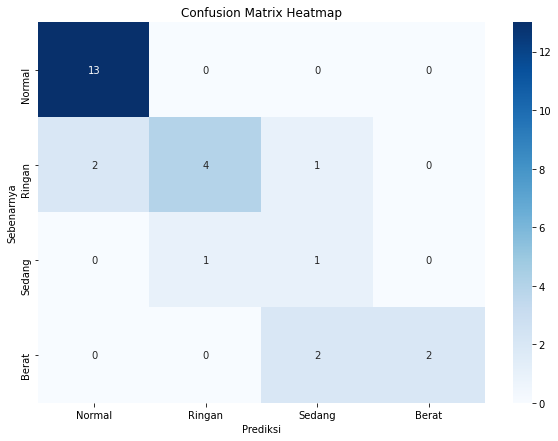

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.85,1.00,0.87,1.00,0.93
Ringan,0.85,0.95,0.57,0.80,0.86,0.67
Sedang,0.85,0.88,0.50,0.25,0.95,0.33
Berat,0.92,1.00,0.50,1.00,0.92,0.67


KNN


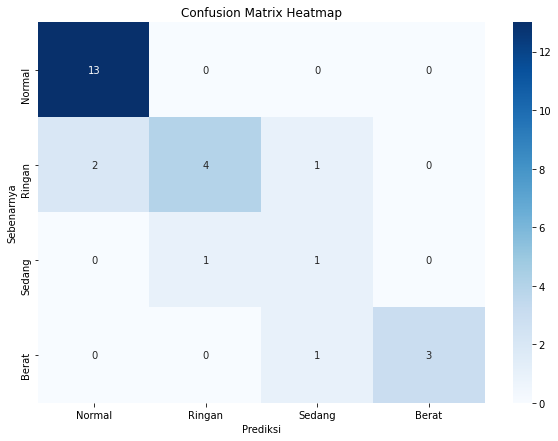

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.85,1.00,0.87,1.00,0.93
Ringan,0.85,0.95,0.57,0.80,0.86,0.67
Sedang,0.88,0.92,0.50,0.33,0.96,0.40
Berat,0.96,1.00,0.75,1.00,0.96,0.86


LogisticRegression


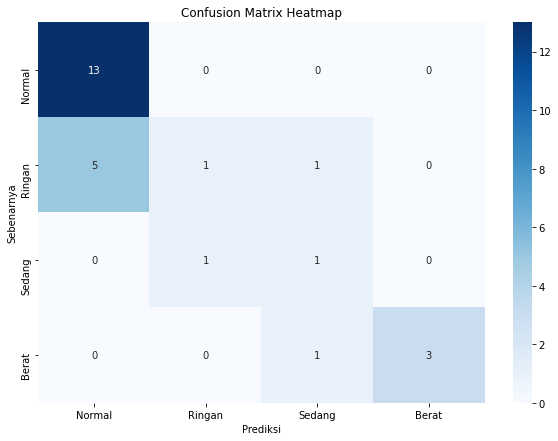

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.81,0.62,1.00,0.72,1.00,0.84
Ringan,0.73,0.95,0.14,0.50,0.75,0.22
Sedang,0.88,0.92,0.50,0.33,0.96,0.40
Berat,0.96,1.00,0.75,1.00,0.96,0.86


RandomForest


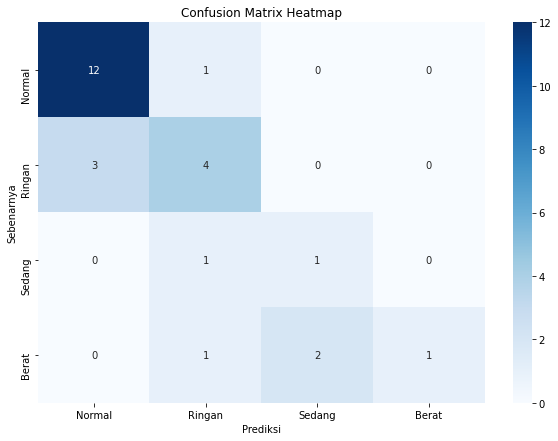

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.85,0.77,0.92,0.80,0.91,0.86
Ringan,0.77,0.84,0.57,0.57,0.84,0.57
Sedang,0.88,0.92,0.50,0.33,0.96,0.40
Berat,0.88,1.00,0.25,1.00,0.88,0.40


,,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
0,SVM,0.77,0.23,0.77,0.77,0.23,0.77
0,KNN,0.81,0.24,0.81,0.81,0.24,0.81
0,LogisticRegression,0.69,0.22,0.69,0.69,0.22,0.69
0,RandomForest,0.69,0.22,0.69,0.69,0.22,0.69


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.88,0.92,0.64,0.73,0.93,0.65
KNN,0.90,0.93,0.71,0.75,0.94,0.71
LogisticRegression,0.85,0.87,0.60,0.64,0.92,0.58
RandomForest,0.85,0.88,0.56,0.68,0.90,0.56


In [32]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

knn = df_test[15]
logistic = df_test[16]
forest = df_test[17]
svm = df_test[18]
dokter = df_test[20]

print(dokter.value_counts())

list_model = [svm, knn, logistic, forest]
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
result = {}
micro_model = {}

for model_name, model_prediction in zip(models_name, list_model):
    labels = ['Normal', 'Ringan', 'Sedang', 'Berat']

    metrics_per_class = calculate_metrics_all(dokter, model_prediction, labels)    

    print(model_name)

    conf_matrix = confusion_matrix(dokter, model_prediction, labels=labels)

    # Create a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediksi')
    plt.ylabel('Sebenarnya')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    y_true = dokter
    y_pred = model_prediction

    micro_model[model_name] = count_micro(y_true, y_pred)
    # micro_model.append(count_micro(y_true, y_pred), ignore_index = True)

    display(metrics_per_class.round(2))
    result[model_name] = metrics_per_class.mean()

display(pd.concat(micro_model).reset_index(level=0).rename(columns={'level_0': ''}).round(2))
display(pd.DataFrame(result).T.round(2))


In [37]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
result_per_model = {}
df_concat = None

for model_name in models_name:
    result_per_class, result_all = calculate_model_metrics(model_name, X_test, y_test)

    # Concatenate the DataFrames
    df_concat = pd.concat([result_per_class])

    display(result_per_class)

# Group by index and calculate the mean
df_mean = df_concat.groupby(df_concat.index).mean()
result = pd.DataFrame(result_per_model).transpose()

df_mean

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.94,0.95,0.88,0.83,0.97,0.86
Sedang,0.98,1.00,0.92,1.00,0.97,0.96
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.97,0.89,0.89,0.97,0.89
Ringan,0.90,0.92,0.82,0.74,0.95,0.78
Sedang,0.89,0.89,0.88,0.78,0.94,0.82
Berat,0.94,1.00,0.76,1.00,0.92,0.86


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.94,0.95,0.88,0.83,0.97,0.86
Sedang,0.95,1.00,0.83,1.00,0.93,0.91
Berat,0.98,0.97,1.00,0.91,1.00,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.95,0.95,0.86,0.98,0.90
Ringan,0.93,0.94,0.88,0.79,0.97,0.83
Sedang,0.90,0.95,0.79,0.86,0.92,0.83
Berat,0.95,0.98,0.86,0.95,0.95,0.90


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Berat,0.95,0.98,0.86,0.95,0.95,0.90
Normal,0.95,0.95,0.95,0.86,0.98,0.90
Ringan,0.93,0.94,0.88,0.79,0.97,0.83
Sedang,0.90,0.95,0.79,0.86,0.92,0.83


## Experiment

### With One-hot all categorial

In [52]:
df_prep = df.copy()
df_prep = numerical_prep(df_prep, numerical_column)
df_prep = categorical_prep(df_prep)
category_other = {
    'TRUE': 1,
    'True': 1,
    'FALSE': 0,
    'False': 0,
    True: 1,
    False: 0
}
df_prep = df_prep.replace(category_other)
final_prep = one_hot_prep(df_prep, ['Suara Mengorok', 'Ngantuk saat beraktifitas', 'Jenis Kelamin', 'Kondisi yang menyertai: Lainnya'])

print(final_prep)
print(final_prep.columns)

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_models(X_train, y_train)

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
     Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  Lingkar Perut (cm)  \
0      0.698795     0.925000    0.668874     0.155937            0.750000   
1      0.313253     0.741667    0.728477     0.242319            0.833333   
2      0.433735     0.950000    0.536424     0.112219            0.533333   
3      0.457831     0.850000    0.629139     0.166417            0.666667   
4      0.614458     0.875000    0.536424     0.130200            0.491667   
..          ...          ...         ...          ...                 ...   
399    0.614458     0.808333    0.748344     0.220583            0.783333   
400    0.457831     0.758333    0.622517     0.196065            0.566667   
401    0.566265     0.925000    0.887417     0.218686            0.791667   
402    0.626506     0.783333    0.536424     0.156458            0.633333   
403    0.698795     0.825000    0.635762     0.176716            0.650000   

     Lin

In [54]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_train, y_train)
validation_model(models_name, X_test, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.95,0.82,0.85,0.94,0.83
Ringan,0.83,0.88,0.67,0.67,0.88,0.67
Sedang,0.89,0.92,0.80,0.75,0.94,0.78
Berat,0.98,0.99,0.95,0.97,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.95,0.93,0.87,0.97,0.90
Ringan,0.87,0.93,0.72,0.78,0.90,0.75
Sedang,0.91,0.93,0.83,0.80,0.95,0.81
Berat,0.98,0.99,0.95,0.96,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.99,0.99,1.00,0.96,1.00,0.98
Ringan,0.98,0.99,0.93,0.98,0.98,0.95
Sedang,0.98,0.99,0.97,0.96,0.99,0.97
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.98,0.89,0.94,0.97,0.92
Ringan,0.91,0.92,0.88,0.75,0.97,0.81
Sedang,0.90,0.93,0.83,0.83,0.93,0.83
Berat,0.95,0.98,0.86,0.95,0.95,0.90


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.95,0.89,0.85,0.97,0.87
Ringan,0.89,0.91,0.82,0.70,0.95,0.76
Sedang,0.86,0.91,0.75,0.78,0.90,0.77
Berat,0.94,0.98,0.81,0.94,0.94,0.87


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.97,0.89,0.89,0.97,0.89
Ringan,0.93,0.94,0.88,0.79,0.97,0.83
Sedang,0.96,0.98,0.92,0.96,0.97,0.94
Berat,0.99,1.00,0.95,1.00,0.98,0.98


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.98,0.98,0.95,0.95,0.98,0.95
Ringan,0.94,0.94,0.94,0.80,0.98,0.86
Sedang,0.93,0.96,0.83,0.91,0.93,0.87
Berat,0.96,0.98,0.90,0.95,0.97,0.93


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.93,0.95,0.87,0.87,0.95,0.87
KNN,0.91,0.94,0.82,0.82,0.94,0.82
LogisticRegression,0.96,0.97,0.91,0.91,0.97,0.91
RandomForest,0.95,0.97,0.91,0.90,0.97,0.90


### With z-score normalization

In [55]:
df_prep = df.copy()
df_prep = numerical_prep(df_prep, numerical_column, norm_type='z')
df_prep = categorical_prep(df_prep)
category_other = {
    'TRUE': 1,
    'True': 1,
    'FALSE': 0,
    'False': 0,
    True: 1,
    False: 0
}
df_prep = df_prep.replace(category_other)
# final_prep = one_hot_prep(df_prep, ['Suara Mengorok', 'Ngantuk saat beraktifitas', 'Jenis Kelamin', 'Kondisi yang menyertai: Lainnya'])
final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])

print(final_prep)
print(final_prep.columns)

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_models(X_train, y_train)

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
     Jenis Kelamin  Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  \
0                1    0.805805     0.915667    1.315513     0.598494   
1                0   -1.005852    -0.841542    1.711415     2.040055   
2                1   -0.439709     1.155286    0.435732    -0.131082   
3                1   -0.326480     0.196809    1.051579     0.773392   
4                1    0.409505     0.436428    0.435732     0.168997   
..             ...         ...          ...         ...          ...   
399              0    0.409505    -0.202557    1.843382     1.677321   
400              0   -0.326480    -0.681795    1.007590     1.268152   
401              1    0.183048     0.915667    2.767153     1.645666   
402              0    0.466120    -0.442176    0.435732     0.607193   
403              0    0.805805    -0.042810    1.095568     0.945267   

     Lingkar Perut (cm)  Lingkar Leher (cm)  Suara Mengorok  \
0    

In [56]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_train, y_train)
validation_model(models_name, X_test, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.97,0.91,0.90,0.97,0.91
Ringan,0.88,0.92,0.74,0.78,0.91,0.76
Sedang,0.90,0.93,0.82,0.78,0.94,0.79
Berat,0.98,0.99,0.95,0.96,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.91,0.90,0.93,0.76,0.97,0.84
Ringan,0.80,0.86,0.65,0.62,0.87,0.64
Sedang,0.87,0.95,0.62,0.80,0.89,0.70
Berat,0.96,0.98,0.90,0.95,0.97,0.92


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.96,0.93,0.89,0.97,0.91
Ringan,0.87,0.92,0.74,0.76,0.91,0.75
Sedang,0.89,0.93,0.76,0.76,0.93,0.76
Berat,0.97,0.98,0.94,0.95,0.98,0.94


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.98,0.98,0.98,0.95,0.99,0.96
Ringan,0.95,0.97,0.91,0.92,0.97,0.91
Sedang,0.97,0.98,0.93,0.93,0.98,0.93
Berat,1.00,1.00,0.99,1.00,1.00,0.99


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.94,0.95,0.88,0.83,0.97,0.86
Sedang,0.96,0.98,0.92,0.96,0.97,0.94
Berat,0.99,1.00,0.95,1.00,0.98,0.98


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.94,0.89,0.81,0.97,0.85
Ringan,0.89,0.91,0.82,0.70,0.95,0.76
Sedang,0.86,0.91,0.75,0.78,0.90,0.77
Berat,0.95,1.00,0.81,1.00,0.94,0.89


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.97,0.89,0.89,0.97,0.89
Ringan,0.93,0.94,0.88,0.79,0.97,0.83
Sedang,0.96,0.98,0.92,0.96,0.97,0.94
Berat,0.99,1.00,0.95,1.00,0.98,0.98


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.95,0.95,0.94,0.84,0.98,0.89
Sedang,0.91,0.95,0.83,0.87,0.93,0.85
Berat,0.95,0.98,0.86,0.95,0.95,0.90


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.96,0.98,0.92,0.92,0.98,0.92
KNN,0.91,0.94,0.82,0.82,0.94,0.82
LogisticRegression,0.96,0.97,0.91,0.91,0.97,0.91
RandomForest,0.94,0.96,0.89,0.89,0.96,0.89


### With z-score normalization and one-hot all categorical data

In [57]:
df_prep = df.copy()
df_prep = numerical_prep(df_prep, numerical_column, norm_type='z')
df_prep = categorical_prep(df_prep)

final_prep = one_hot_prep(df_prep, ['Suara Mengorok', 'Ngantuk saat beraktifitas', 'Jenis Kelamin', 'Kondisi yang menyertai: Lainnya'])

print(final_prep)
print(final_prep.columns)

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_models(X_train, y_train)

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
     Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  Lingkar Perut (cm)  \
0      0.805805     0.915667    1.315513     0.598494            1.877892   
1     -1.005852    -0.841542    1.711415     2.040055            2.425656   
2     -0.439709     1.155286    0.435732    -0.131082            0.453706   
3     -0.326480     0.196809    1.051579     0.773392            1.330129   
4      0.409505     0.436428    0.435732     0.168997            0.179824   
..          ...          ...         ...          ...                 ...   
399    0.409505    -0.202557    1.843382     1.677321            2.096998   
400   -0.326480    -0.681795    1.007590     1.268152            0.672812   
401    0.183048     0.915667    2.767153     1.645666            2.151774   
402    0.466120    -0.442176    0.435732     0.607193            1.111023   
403    0.805805    -0.042810    1.095568     0.945267            1.220576   

     Lin

In [58]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_train, y_train)
validation_model(models_name, X_test, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.95,0.94,0.88,0.98,0.91
Ringan,0.86,0.92,0.67,0.76,0.89,0.71
Sedang,0.89,0.92,0.79,0.75,0.93,0.77
Berat,0.98,0.99,0.96,0.96,0.99,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.91,0.96,0.78,0.99,0.86
Ringan,0.84,0.90,0.66,0.71,0.88,0.68
Sedang,0.87,0.94,0.66,0.77,0.90,0.71
Berat,0.96,0.98,0.91,0.94,0.97,0.92


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.93,0.90,0.97,0.92
Ringan,0.88,0.92,0.76,0.77,0.92,0.77
Sedang,0.90,0.94,0.79,0.80,0.94,0.79
Berat,0.98,0.99,0.96,0.96,0.99,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.00,1.00,1.0,1.00
Ringan,1.0,1.0,0.99,1.00,1.0,0.99
Sedang,1.0,1.0,1.00,0.99,1.0,0.99
Berat,1.0,1.0,1.00,1.00,1.0,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.91,0.94,0.82,0.78,0.95,0.80
Sedang,0.93,0.96,0.83,0.91,0.93,0.87
Berat,0.98,0.98,0.95,0.95,0.98,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.92,0.95,0.78,0.98,0.86
Ringan,0.90,0.94,0.76,0.76,0.94,0.76
Sedang,0.89,0.91,0.83,0.80,0.93,0.82
Berat,0.94,1.00,0.76,1.00,0.92,0.86


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.95,0.90,0.98,0.92
Ringan,0.94,0.95,0.88,0.83,0.97,0.86
Sedang,0.95,0.98,0.88,0.95,0.95,0.91
Berat,0.98,0.98,0.95,0.95,0.98,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.98,0.98,0.95,0.95,0.98,0.95
Ringan,0.94,0.94,0.94,0.80,0.98,0.86
Sedang,0.93,0.96,0.83,0.91,0.93,0.87
Berat,0.96,0.98,0.90,0.95,0.97,0.93


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.94,0.96,0.89,0.88,0.96,0.89
KNN,0.91,0.94,0.83,0.84,0.94,0.83
LogisticRegression,0.96,0.97,0.91,0.91,0.97,0.91
RandomForest,0.95,0.97,0.91,0.90,0.97,0.90


### With IQR to remove outliers

In [63]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [64]:
df_prep = df.copy()

def remove_outliers_by_class(df, class_column):
    filtered_dfs = []

    for class_value in df[class_column].unique():
        class_df = df[df[class_column] == class_value]

        filter_column = ['BMI (Kg/m2)', 'Usia (thn)', 'Lingkar Leher (cm)', 'Lingkar Perut (cm)', 'Terbangun (berapa kali): buang air kecil', 'Terbangun (berapa kali): tersedak', 'Durasi tidur (jam)']
        for column in filter_column:
            class_df = remove_outliers(class_df, column)

        filtered_dfs.append(class_df)

    return pd.concat(filtered_dfs, ignore_index=True)

# Remove outliers by class
df_prep = remove_outliers_by_class(df_prep, 'Label (OSA)')

print("Filtered DataFrame by Class:")
print(df_prep)
display(df_prep['Label (OSA)'].value_counts())

df_prep = numerical_prep(df_prep, numerical_column, norm_type='minmax')
df_prep = categorical_prep(df_prep)
category_other = {
    'TRUE': 1,
    'True': 1,
    'FALSE': 0,
    'False': 0,
    True: 1,
    False: 0
}
df_prep = df_prep.replace(category_other)
# final_prep = one_hot_prep(df_prep, ['Suara Mengorok', 'Ngantuk saat beraktifitas', 'Jenis Kelamin', 'Kondisi yang menyertai: Lainnya'])
final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])

print(final_prep)
print(final_prep.columns)

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_models(X_train, y_train)

Filtered DataFrame by Class:
    Jenis Kelamin  Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  \
0       Laki-laki        59.0        176.0       110.0    35.511364   
1       Laki-laki        39.0        167.0       104.0    37.290688   
2       Laki-laki        38.0        180.0        96.0    29.629630   
3       Laki-laki        48.0        170.0        95.0    32.871972   
4       Laki-laki        53.0        163.0        93.0    35.003199   
..            ...         ...          ...         ...          ...   
270     Perempuan        49.0        163.0        60.0    22.582709   
271     Laki-laki        35.0        175.0        83.0    27.102041   
272     Laki-laki        47.0        170.0        76.0    26.297578   
273     Laki-laki        59.0        176.0        79.0    25.503616   
274     Perempuan        35.0        164.0        62.0    23.051755   

     Lingkar Perut (cm)  Lingkar Leher (cm)           Suara Mengorok  \
0                 130.0                39.0   

Berat     87
Normal    72
Ringan    65
Sedang    51
Name: Label (OSA), dtype: int64

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
     Jenis Kelamin  Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  \
0                1    0.698795     0.925000    0.668874     0.155937   
1                1    0.457831     0.850000    0.629139     0.166417   
2                1    0.445783     0.958333    0.576159     0.121293   
3                1    0.566265     0.875000    0.569536     0.140391   
4                1    0.626506     0.816667    0.556291     0.152944   
..             ...         ...          ...         ...          ...   
270              0    0.578313     0.816667    0.337748     0.079786   
271              1    0.409639     0.916667    0.490066     0.106405   
272              1    0.554217     0.875000    0.443709     0.101667   
273              1    0.698795     0.925000    0.463576     0.096990   
274              0    0.409639     0.825000    0.350993     0.082549   

     Lingkar Perut (cm)  Lingkar Leher (cm)  Suara Mengorok  \
0    

c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
display(validation_model(models_name, X_train, y_train))
validation_model(models_name, X_test, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.99,0.99,1.00,0.97,1.00,0.98
Ringan,0.97,0.99,0.91,0.98,0.97,0.94
Sedang,0.98,0.98,0.98,0.93,0.99,0.95
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.99,0.99,1.00,0.97,1.00,0.98
Ringan,0.97,0.99,0.91,0.98,0.97,0.94
Sedang,0.98,0.98,0.98,0.93,0.99,0.95
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,0.99,1.00,0.98,1.00,0.99
Ringan,1.0,1.00,0.98,1.00,0.99,0.99
Sedang,1.0,1.00,1.00,1.00,1.00,1.00
Berat,1.0,1.00,1.00,1.00,1.00,1.00


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.99,0.99,0.97,0.97,0.99,0.97
KNN,1.00,1.00,1.00,1.00,1.00,1.00
LogisticRegression,0.99,0.99,0.97,0.97,0.99,0.97
RandomForest,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.95,1.00,0.88,1.00,0.93
Ringan,0.89,0.98,0.58,0.88,0.89,0.70
Sedang,0.91,0.91,0.90,0.69,0.98,0.78
Berat,0.98,1.00,0.95,1.00,0.97,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.91,0.90,0.93,0.76,0.97,0.84
Ringan,0.85,0.95,0.50,0.75,0.87,0.60
Sedang,0.93,0.93,0.90,0.75,0.98,0.82
Berat,0.98,1.00,0.95,1.00,0.97,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.95,0.86,0.86,0.95,0.86
Ringan,0.87,0.91,0.75,0.69,0.93,0.72
Sedang,0.93,0.96,0.80,0.80,0.96,0.80
Berat,0.98,1.00,0.95,1.00,0.97,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.98,0.93,0.93,0.98,0.93
Ringan,0.91,0.93,0.83,0.77,0.95,0.80
Sedang,0.95,0.98,0.80,0.89,0.96,0.84
Berat,1.00,1.00,1.00,1.00,1.00,1.00


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.94,0.96,0.86,0.86,0.96,0.85
KNN,0.92,0.95,0.82,0.82,0.95,0.81
LogisticRegression,0.93,0.95,0.84,0.84,0.95,0.84
RandomForest,0.95,0.97,0.89,0.90,0.97,0.89


### With PCA and normal preprocessing

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
     Jenis Kelamin  Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  \
0                1    0.647887        0.775    0.694444     0.653085   
1                0    0.197183        0.225    0.777778     1.109646   
2                1    0.338028        0.850    0.509259     0.422018   
3                1    0.366197        0.550    0.638889     0.708477   
4                1    0.549296        0.625    0.509259     0.517057   
..             ...         ...          ...         ...          ...   
399              0    0.549296        0.425    0.805556     0.994763   
400              0    0.366197        0.275    0.629630     0.865174   
401              1    0.492958        0.775    1.000000     0.984738   
402              0    0.563380        0.350    0.509259     0.655840   
403              0    0.647887        0.475    0.648148     0.762912   

     Lingkar Perut (cm)  Lingkar Leher (cm)  Suara Mengorok  \
0    

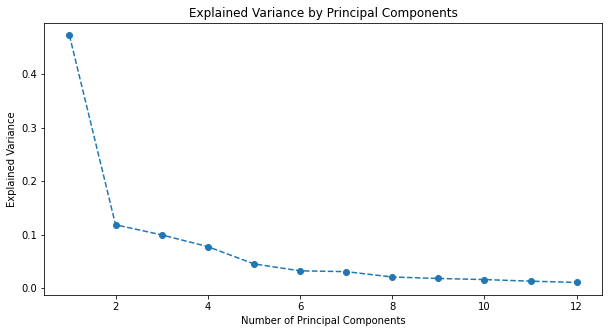

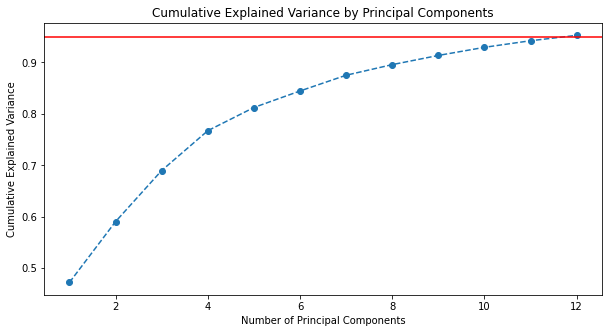

Number of components explaining 95% variance: 12


In [47]:
from sklearn.decomposition import PCA

df_prep = df.copy()

df_prep = numerical_prep(df_prep, numerical_column, norm_type='minmax')
df_prep = categorical_prep(df_prep)
category_other = {
    'TRUE': 1,
    'True': 1,
    'FALSE': 0,
    'False': 0,
    True: 1,
    False: 0
}
df_prep = df_prep.replace(category_other)
# final_prep = one_hot_prep(df_prep, ['Suara Mengorok', 'Ngantuk saat beraktifitas', 'Jenis Kelamin', 'Kondisi yang menyertai: Lainnya'])
final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])

print(final_prep)
print(final_prep.columns)

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("xtrain")
print(X_train)

train_models(X_train, y_train)



# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

# Calculate cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Find the number of components that explain at least 95% of the variance
num_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.95) + 1
print(f'Number of components explaining 95% variance: {num_components}')

In [48]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_train, y_train)
validation_model(models_name, X_test, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.96,0.89,0.88,0.96,0.88
Ringan,0.85,0.90,0.71,0.72,0.90,0.71
Sedang,0.89,0.92,0.80,0.76,0.94,0.78
Berat,0.98,1.00,0.95,0.99,0.98,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.94,0.89,0.84,0.96,0.86
Ringan,0.83,0.88,0.71,0.67,0.89,0.69
Sedang,0.88,0.93,0.74,0.76,0.92,0.75
Berat,0.97,1.00,0.90,0.99,0.97,0.94


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.96,0.88,0.88,0.96,0.88
Ringan,0.85,0.90,0.69,0.72,0.89,0.71
Sedang,0.89,0.92,0.80,0.76,0.94,0.78
Berat,0.98,0.99,0.96,0.97,0.99,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.97,0.98,0.95,0.93,0.98,0.94
Ringan,0.94,0.96,0.87,0.89,0.95,0.88
Sedang,0.97,0.98,0.93,0.93,0.98,0.93
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.98,0.84,0.94,0.95,0.89
Ringan,0.91,0.92,0.88,0.75,0.97,0.81
Sedang,0.95,0.96,0.92,0.92,0.96,0.92
Berat,0.99,1.00,0.95,1.00,0.98,0.98


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.95,0.84,0.84,0.95,0.84
Ringan,0.90,0.92,0.82,0.74,0.95,0.78
Sedang,0.88,0.89,0.83,0.77,0.93,0.80
Berat,0.93,0.98,0.76,0.94,0.92,0.84


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.97,0.79,0.88,0.94,0.83
Ringan,0.90,0.91,0.88,0.71,0.97,0.79
Sedang,0.95,1.00,0.83,1.00,0.93,0.91
Berat,0.98,0.97,1.00,0.91,1.00,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.98,0.84,0.94,0.95,0.89
Ringan,0.89,0.89,0.88,0.68,0.97,0.77
Sedang,0.86,0.88,0.83,0.74,0.93,0.78
Berat,0.93,1.00,0.71,1.00,0.91,0.83


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.95,0.97,0.90,0.90,0.97,0.90
KNN,0.91,0.94,0.82,0.82,0.94,0.82
LogisticRegression,0.94,0.96,0.88,0.88,0.96,0.87
RandomForest,0.91,0.94,0.82,0.84,0.94,0.82


### Correlation

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
Features to drop: ['Lingkar Perut (cm)', 'Lingkar Leher (cm)']
Reduced DataFrame:
     Jenis Kelamin  Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  \
0                1    0.698795     0.925000    0.668874     0.155937   
1                0    0.313253     0.741667    0.728477     0.242319   
2                1    0.433735     0.950000    0.536424     0.112219   
3                1    0.457831     0.850000    0.629139     0.166417   
4                1    0.614458     0.875000    0.536424     0.130200   
..             ...         ...          ...         ...          ...   
399              0    0.614458     0.808333    0.748344     0.220583   
400              0    0.457831     0.758333    0.622517     0.196065   
401              1    0.566265     0.925000    0.887417     0.218686   
402              0    0.626506     0.783333    0.536424     0.156458   
403              0    0.698795     0.825000    0.635762    

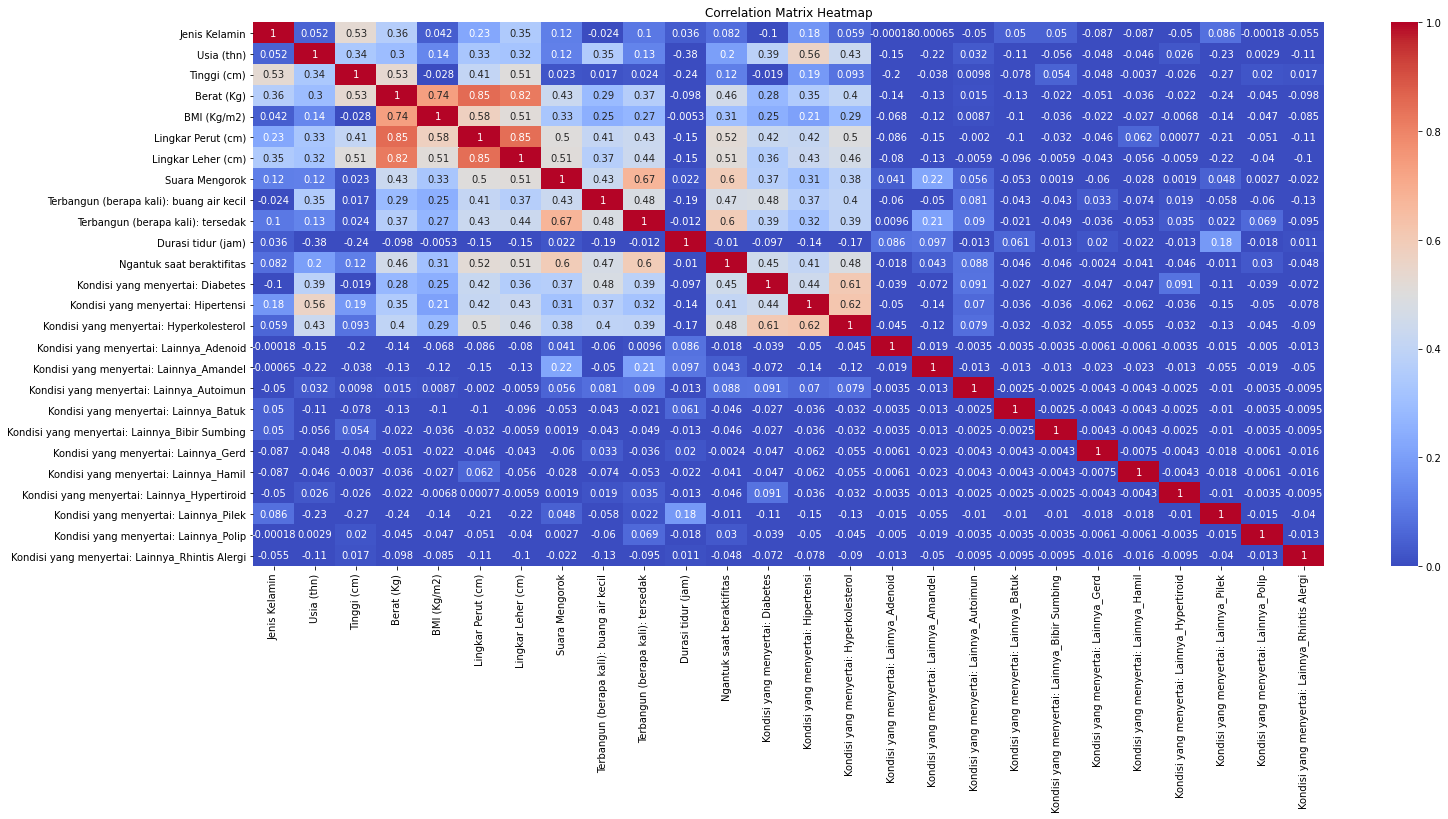

In [147]:
import pandas as pd
import numpy as np

df_prep = df.copy()

df_prep = numerical_prep(df_prep, numerical_column, norm_type='minmax')
df_prep = categorical_prep(df_prep)
category_other = {
    'TRUE': 1,
    'True': 1,
    'FALSE': 0,
    'False': 0,
    True: 1,
    False: 0,
    # 'Normal': 0,
    # 'Ringan': 1,
    # 'Sedang': 2,
    # 'Berat': 3
}
df_prep = df_prep.replace(category_other)
# final_prep = one_hot_prep(df_prep, ['Suara Mengorok', 'Ngantuk saat beraktifitas', 'Jenis Kelamin', 'Kondisi yang menyertai: Lainnya'])
final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])

# display(final_prep['Label (OSA)'])

# Step 1: Calculate the correlation matrix
correlation_matrix = final_prep.corr()

# Step 2: Identify highly correlated features
threshold = 0.8
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(f"Features to drop: {to_drop}")

# Step 3: Remove redundant features
df_reduced = final_prep.drop(columns=to_drop)
print("Reduced DataFrame:")
print(df_reduced)

# The df_reduced DataFrame now contains only the selected features
import seaborn as sns
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [47]:
train_models(X_train, y_train)

Training SVM_ml...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters for SVM_ml: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Training RandomForest_ml...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for RandomForest_ml: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}
Training KNN_ml...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN_ml: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Training LogisticRegression_ml...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for LogisticRegression_ml: {'C': 10, 'solver': 'newton-cg'}


{'SVM_ml': (SVC(C=1, gamma=1, kernel='linear'),
  {'C': [0.1, 1, 10, 100, 200],
   'gamma': [1, 0.1, 0.01, 0.001],
   'kernel': ['rbf', 'linear']}),
 'RandomForest_ml': (RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=50),
  {'n_estimators': [10, 50, 100, 200, 300],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [2, 4, 6, 8, 10, 12]}),
 'KNN_ml': (KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance'),
  {'n_neighbors': [3, 5, 7, 9, 11],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan']}),
 'LogisticRegression_ml': (LogisticRegression(C=10, max_iter=200, solver='newton-cg'),
  {'C': [0.1, 1, 10, 100, 200],
   'solver': ['newton-cg', 'lbfgs', 'liblinear']})}

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


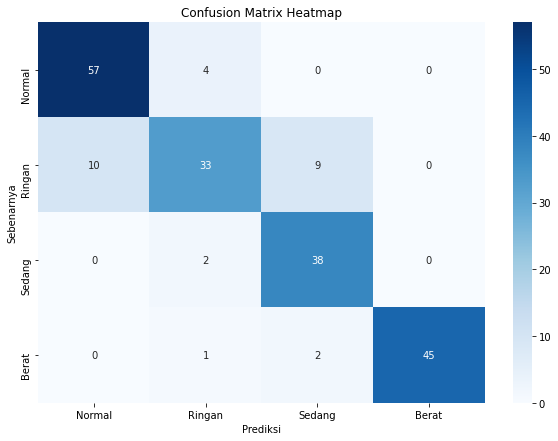

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.93,0.93,0.85,0.97,0.89
Ringan,0.87,0.95,0.63,0.82,0.88,0.72
Sedang,0.94,0.93,0.95,0.78,0.99,0.85
Berat,0.99,1.00,0.94,1.00,0.98,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


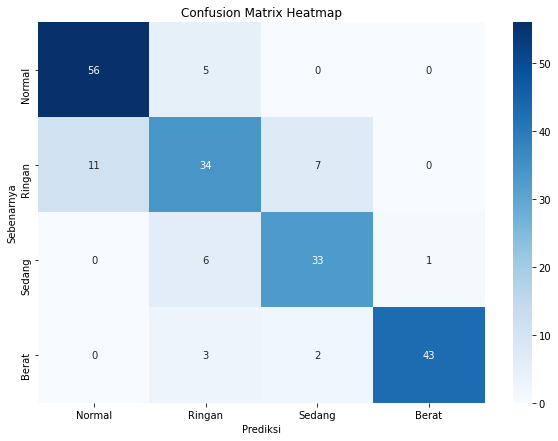

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.92,0.92,0.84,0.96,0.88
Ringan,0.84,0.91,0.65,0.71,0.88,0.68
Sedang,0.92,0.94,0.82,0.79,0.96,0.80
Berat,0.97,0.99,0.90,0.98,0.97,0.93


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


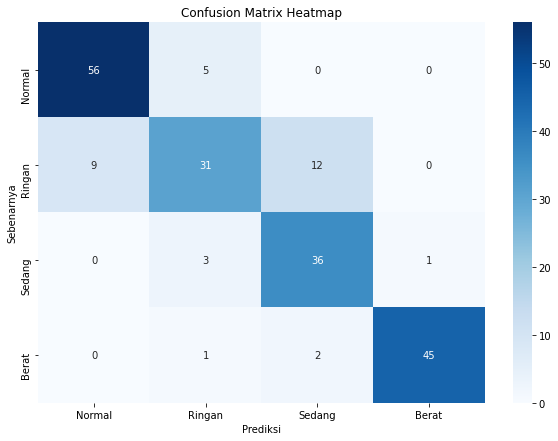

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.93,0.94,0.92,0.86,0.96,0.89
Ringan,0.85,0.94,0.60,0.78,0.87,0.67
Sedang,0.91,0.91,0.90,0.72,0.97,0.80
Berat,0.98,0.99,0.94,0.98,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


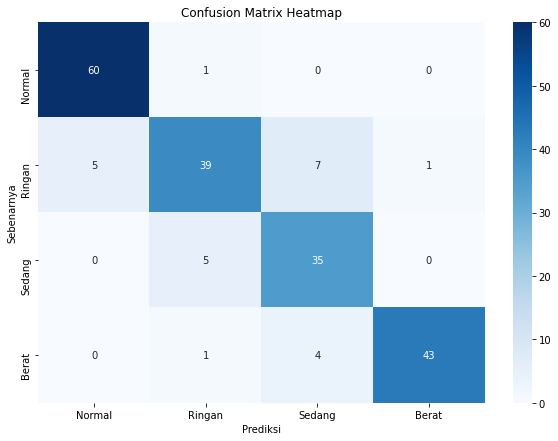

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.97,0.96,0.98,0.92,0.99,0.95
Ringan,0.90,0.95,0.75,0.85,0.92,0.80
Sedang,0.92,0.93,0.88,0.76,0.97,0.81
Berat,0.97,0.99,0.90,0.98,0.97,0.93


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.93,0.95,0.86,0.86,0.95,0.86
KNN,0.91,0.94,0.82,0.83,0.94,0.82
LogisticRegression,0.92,0.95,0.84,0.83,0.95,0.83
RandomForest,0.94,0.96,0.88,0.88,0.96,0.87


In [49]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_train, y_train)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


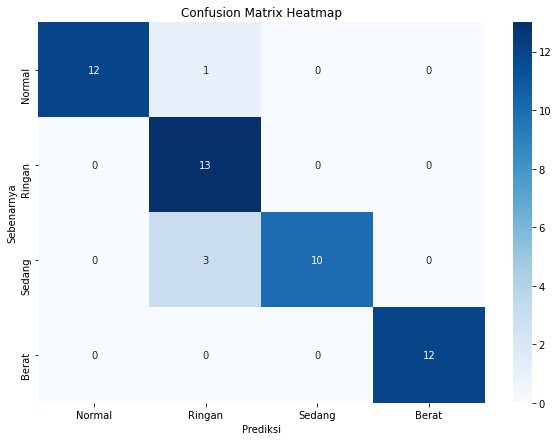

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.98,1.00,0.92,1.00,0.97,0.96
Ringan,0.92,0.89,1.00,0.76,1.00,0.87
Sedang,0.94,1.00,0.77,1.00,0.93,0.87
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


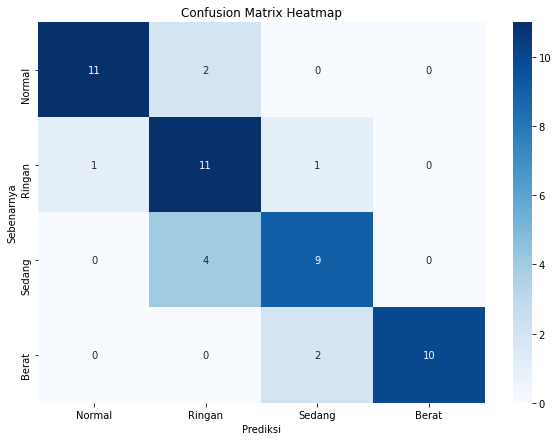

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.97,0.85,0.92,0.95,0.88
Ringan,0.84,0.84,0.85,0.65,0.94,0.73
Sedang,0.86,0.92,0.69,0.75,0.90,0.72
Berat,0.96,1.00,0.83,1.00,0.95,0.91


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


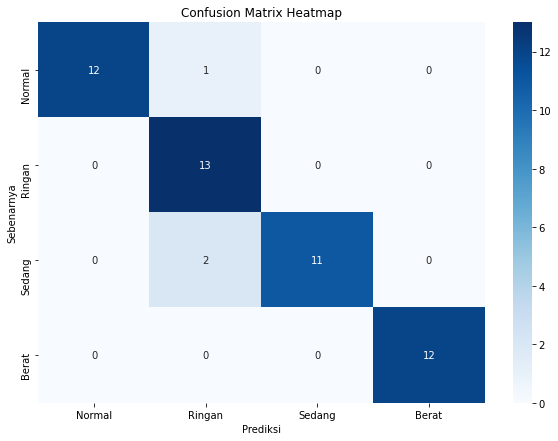

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.98,1.00,0.92,1.00,0.97,0.96
Ringan,0.94,0.92,1.00,0.81,1.00,0.90
Sedang,0.96,1.00,0.85,1.00,0.95,0.92
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


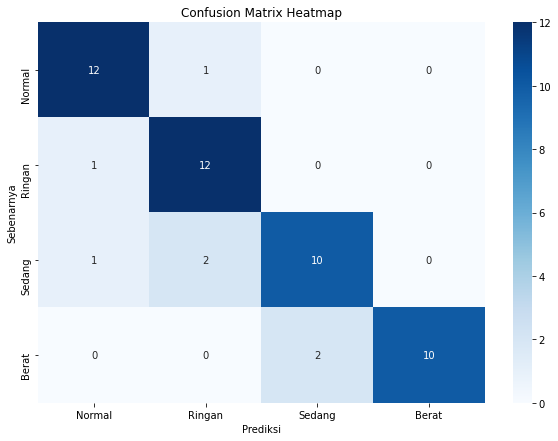

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.95,0.92,0.86,0.97,0.89
Ringan,0.92,0.92,0.92,0.80,0.97,0.86
Sedang,0.90,0.95,0.77,0.83,0.92,0.80
Berat,0.96,1.00,0.83,1.00,0.95,0.91


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.96,0.97,0.92,0.94,0.98,0.92
KNN,0.90,0.93,0.80,0.83,0.93,0.81
LogisticRegression,0.97,0.98,0.94,0.95,0.98,0.94
RandomForest,0.93,0.95,0.86,0.87,0.95,0.86


In [50]:
validation_model(models_name, X_test, y_test)

### Feature Importance

#### Use Random forest

In [142]:
rf_model = load_model(model_name="RandomForest")
feature_importances = rf_model.feature_importances_
feature_importances

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


array([6.55825574e-03, 4.47493897e-02, 3.22838287e-02, 5.04923349e-02,
       7.83988114e-02, 1.00159806e-01, 5.36918283e-02, 1.74115193e-01,
       4.61067792e-02, 1.77553842e-01, 1.54194145e-02, 1.40558672e-01,
       1.61650911e-02, 1.76645395e-02, 2.76575436e-02, 1.03703819e-03,
       7.81247143e-03, 6.39044705e-05, 1.14534875e-03, 9.27223969e-05,
       3.45031277e-04, 8.76968252e-04, 2.12022320e-04, 4.69075367e-03,
       3.98165524e-04, 1.75024411e-03])

In [143]:
rf_model = load_model(model_name="RandomForest")
feature_importances = rf_model.feature_importances_

# Match feature importances with feature names
feature_names = X_train.columns  # Replace with your actual feature names or indices
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances by importance score
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# # Print or inspect sorted feature importances
# for feature, importance in sorted_importances:
#     print(f"Feature: {feature}, Importance: {importance}")
sorted_importances = pd.DataFrame(sorted_importances, columns=['Fitur', 'Importance'])
display(sorted_importances)


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Fitur,Importance
0,Terbangun (berapa kali): tersedak,0.177554
1,Suara Mengorok,0.174115
2,Ngantuk saat beraktifitas,0.140559
3,Lingkar Perut (cm),0.100160
4,BMI (Kg/m2),0.078399
5,Lingkar Leher (cm),0.053692
6,Berat (Kg),0.050492
7,Terbangun (berapa kali): buang air kecil,0.046107
8,Usia (thn),0.044749
9,Tinggi (cm),0.032284


In [144]:
# Menentukan threshold
threshold = 0.1
features_to_keep = sorted_importances[sorted_importances['Importance'] > threshold]['Fitur']

display(features_to_keep)

# Mempertahankan fitur yang penting
X_train_reduced = X_train[features_to_keep]
X_test_reduced = X_test[features_to_keep]

0    Terbangun (berapa kali): tersedak
1                       Suara Mengorok
2            Ngantuk saat beraktifitas
3                   Lingkar Perut (cm)
Name: Fitur, dtype: object

In [145]:
train_models(X_train_reduced, y_train)

Training SVM...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Training RandomForest...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for RandomForest: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 300}
Training KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Training LogisticRegression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for LogisticRegression: {'C': 200, 'solver': 'newton-cg'}


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


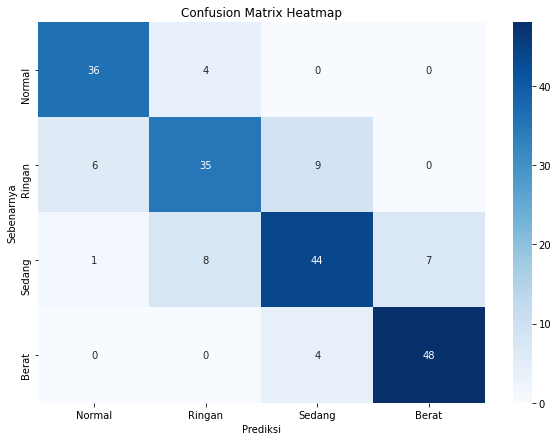

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.95,0.96,0.90,0.84,0.97,0.87
Ringan,0.87,0.92,0.70,0.74,0.90,0.72
Sedang,0.86,0.91,0.73,0.77,0.89,0.75
Berat,0.95,0.95,0.92,0.87,0.97,0.90


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


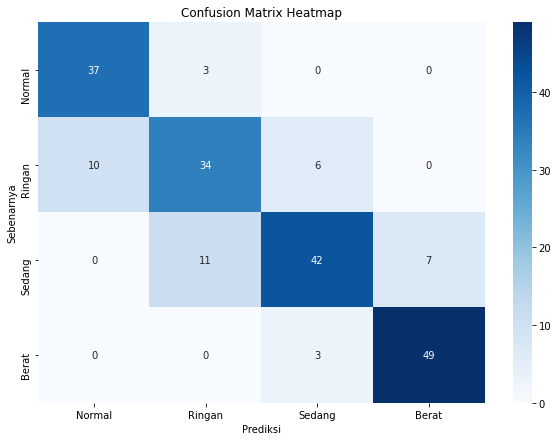

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.94,0.92,0.79,0.98,0.85
Ringan,0.85,0.91,0.68,0.71,0.90,0.69
Sedang,0.87,0.94,0.70,0.82,0.88,0.76
Berat,0.95,0.95,0.94,0.88,0.98,0.91


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


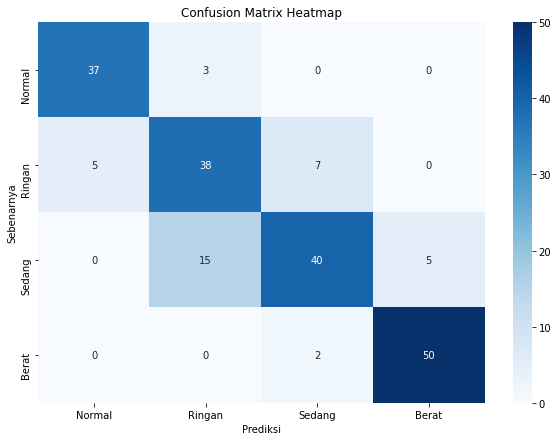

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.92,0.88,0.98,0.90
Ringan,0.85,0.88,0.76,0.68,0.92,0.72
Sedang,0.86,0.94,0.67,0.82,0.87,0.73
Berat,0.97,0.97,0.96,0.91,0.99,0.93


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


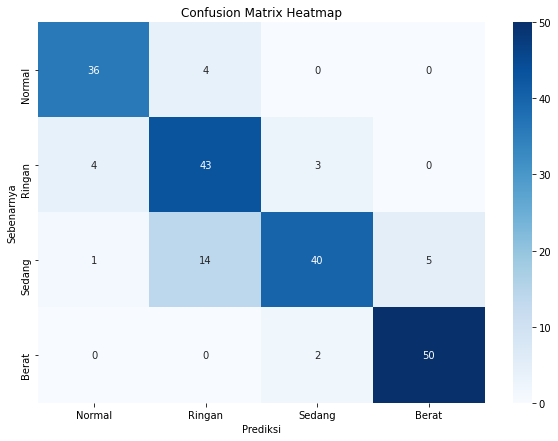

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.90,0.88,0.98,0.89
Ringan,0.88,0.88,0.86,0.70,0.95,0.77
Sedang,0.88,0.96,0.67,0.89,0.87,0.76
Berat,0.97,0.97,0.96,0.91,0.99,0.93


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.90,0.93,0.81,0.81,0.94,0.81
KNN,0.90,0.93,0.81,0.80,0.93,0.80
LogisticRegression,0.91,0.94,0.83,0.82,0.94,0.82
RandomForest,0.92,0.95,0.85,0.85,0.95,0.84


In [146]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_test_reduced, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


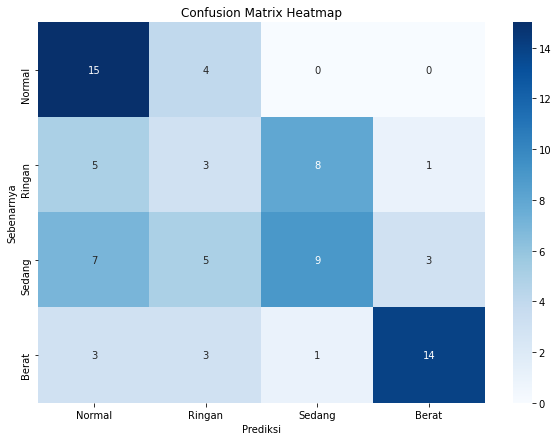

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.77,0.76,0.79,0.50,0.92,0.61
Ringan,0.68,0.81,0.18,0.20,0.79,0.19
Sedang,0.70,0.84,0.38,0.50,0.76,0.43
Berat,0.86,0.93,0.67,0.78,0.89,0.72


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


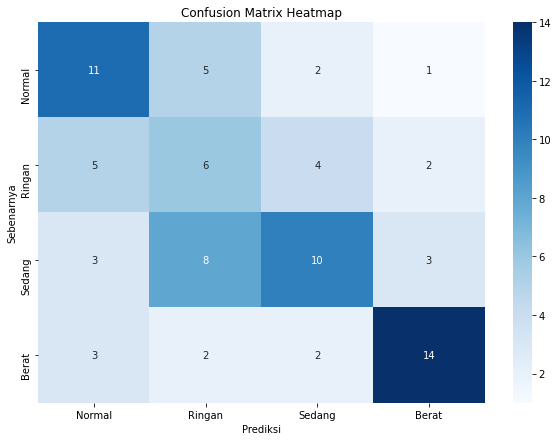

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.77,0.82,0.58,0.50,0.86,0.54
Ringan,0.68,0.77,0.35,0.29,0.82,0.32
Sedang,0.73,0.86,0.42,0.56,0.78,0.48
Berat,0.84,0.90,0.67,0.70,0.89,0.68


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


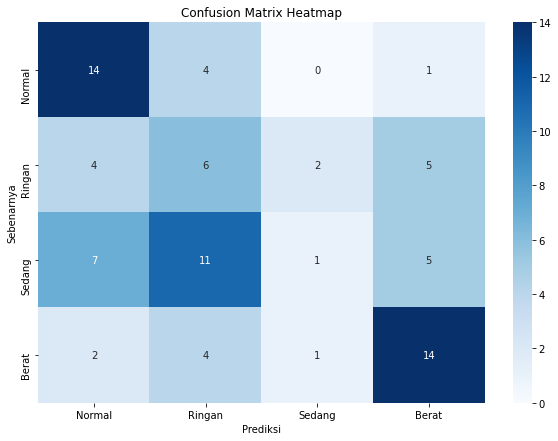

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.78,0.79,0.74,0.52,0.91,0.61
Ringan,0.63,0.70,0.35,0.24,0.80,0.29
Sedang,0.68,0.95,0.04,0.25,0.70,0.07
Berat,0.78,0.82,0.67,0.56,0.88,0.61


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


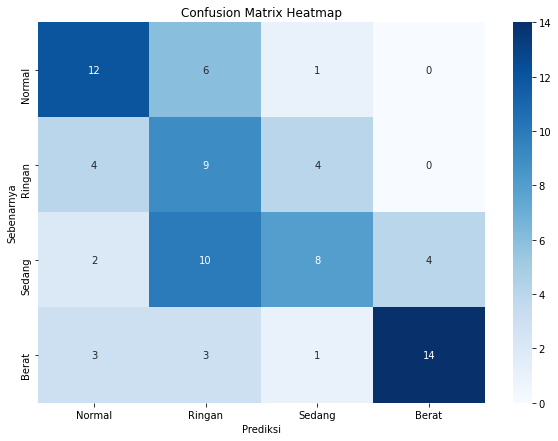

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.80,0.85,0.63,0.57,0.88,0.60
Ringan,0.67,0.70,0.53,0.32,0.85,0.40
Sedang,0.73,0.89,0.33,0.57,0.76,0.42
Berat,0.86,0.93,0.67,0.78,0.89,0.72


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM,0.75,0.84,0.50,0.49,0.84,0.49
KNN,0.75,0.84,0.50,0.51,0.84,0.50
LogisticRegression,0.72,0.81,0.45,0.39,0.82,0.39
RandomForest,0.77,0.85,0.54,0.56,0.85,0.53


### Incremental Learning Test

In [46]:
# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Split test data
num_split = 4
X_testA, X_testB, y_testA, y_testB = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test0, X_test1, y_test0, y_test1 = train_test_split(X_testA, y_testA, test_size=0.5, random_state=42)
X_test2, X_test3, y_test2, y_test3 = train_test_split(X_testB, y_testB, test_size=0.5, random_state=42)

X_tests = [X_test0, X_test1, X_test2, X_test3]
y_tests = [y_test0, y_test1, y_test2, y_test3]

In [47]:
def train_models_ml(X_train, y_train):
    # Define the models and their parameter grids
    models_param_grid = {
        'SVM_ml': (SVC(), {
            'C': [0.1, 1, 10, 100, 200],
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernel': ['rbf', 'linear']
        }),
        'RandomForest_ml': (RandomForestClassifier(), {
            'n_estimators': [10, 50, 100, 200, 300],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [2, 4, 6, 8, 10, 12]
        }),
        'KNN_ml': (KNeighborsClassifier(), {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }),
        'LogisticRegression_ml': (LogisticRegression(max_iter=200), {
            'C': [0.1, 1, 10, 100, 200],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        })
    }

    # Loop through the models and perform GridSearchCV
    for model_name, (model, param_grid) in models_param_grid.items():
        print(f"Training {model_name}...")
        
        scorer = make_scorer(f1_score, average='macro')

        grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='f1_macro', return_train_score=True)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best parameters for {model_name}: {best_params}")

        results = pd.DataFrame(grid_search.cv_results_)
        # display_columns = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
        # results = results[display_columns]
        results.sort_values(by='mean_test_score', ascending=False, inplace=True)

        # display(results)

        # Save the best model
        dump(best_model, f"models/{model_name}_model.joblib")
        models_param_grid[model_name] = (best_model, param_grid)

    return models_param_grid

#initial train with data training
models_param_grid = train_models_ml(X_train, y_train)
    

Training SVM_ml...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters for SVM_ml: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Training RandomForest_ml...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for RandomForest_ml: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
Training KNN_ml...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN_ml: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Training LogisticRegression_ml...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for LogisticRegression_ml: {'C': 10, 'solver': 'newton-cg'}


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


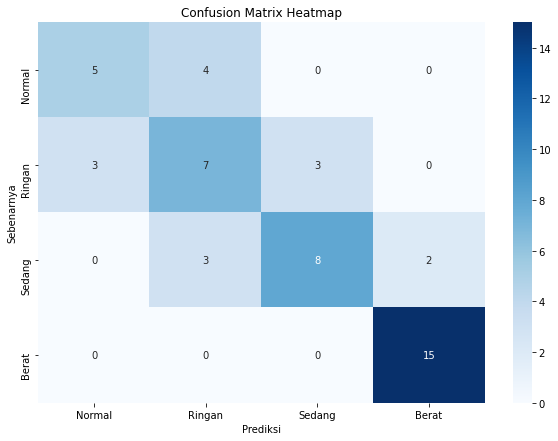

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.86,0.93,0.56,0.62,0.90,0.59
Ringan,0.74,0.81,0.54,0.50,0.83,0.52
Sedang,0.84,0.92,0.62,0.73,0.87,0.67
Berat,0.96,0.94,1.00,0.88,1.00,0.94


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


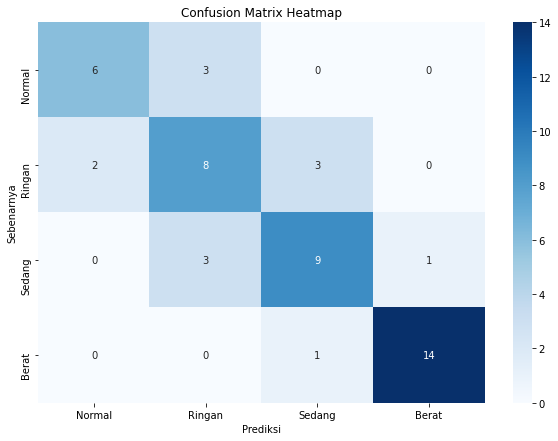

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.90,0.95,0.67,0.75,0.93,0.71
Ringan,0.78,0.84,0.62,0.57,0.86,0.59
Sedang,0.84,0.89,0.69,0.69,0.89,0.69
Berat,0.96,0.97,0.93,0.93,0.97,0.93


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


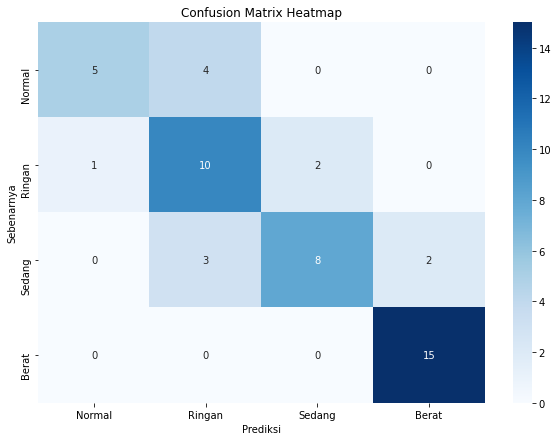

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.90,0.98,0.56,0.83,0.91,0.67
Ringan,0.80,0.81,0.77,0.59,0.91,0.67
Sedang,0.86,0.95,0.62,0.80,0.88,0.70
Berat,0.96,0.94,1.00,0.88,1.00,0.94


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


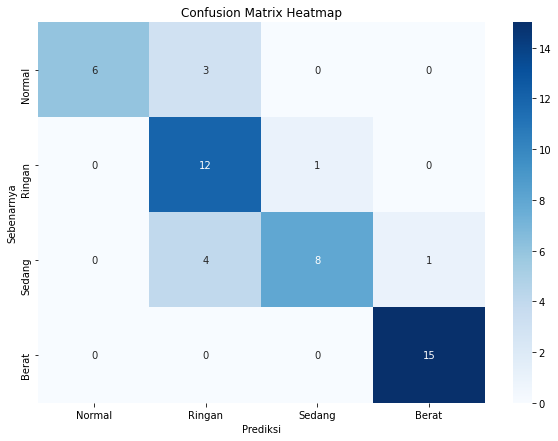

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,1.00,0.67,1.00,0.93,0.80
Ringan,0.84,0.81,0.92,0.63,0.97,0.75
Sedang,0.88,0.97,0.62,0.89,0.88,0.73
Berat,0.98,0.97,1.00,0.94,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


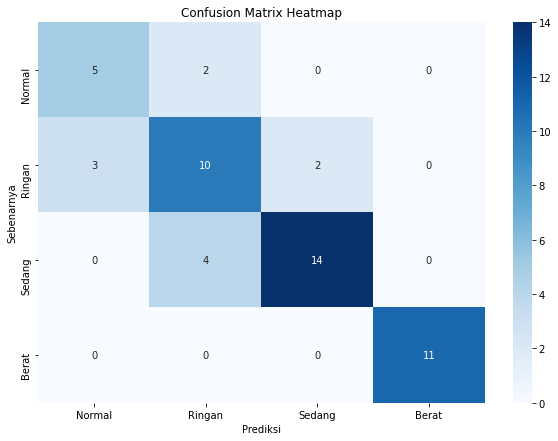

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.90,0.93,0.71,0.62,0.95,0.67
Ringan,0.78,0.83,0.67,0.62,0.86,0.65
Sedang,0.88,0.94,0.78,0.88,0.89,0.82
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


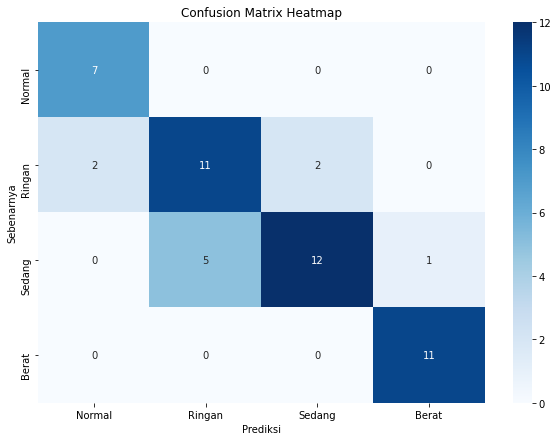

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.95,1.00,0.78,1.00,0.88
Ringan,0.82,0.86,0.73,0.69,0.89,0.71
Sedang,0.84,0.94,0.67,0.86,0.84,0.75
Berat,0.98,0.98,1.00,0.92,1.00,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


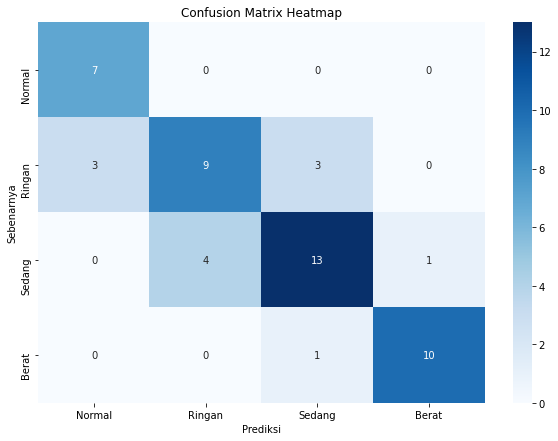

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.93,1.00,0.70,1.00,0.82
Ringan,0.80,0.89,0.60,0.69,0.84,0.64
Sedang,0.82,0.88,0.72,0.76,0.85,0.74
Berat,0.96,0.98,0.91,0.91,0.98,0.91


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


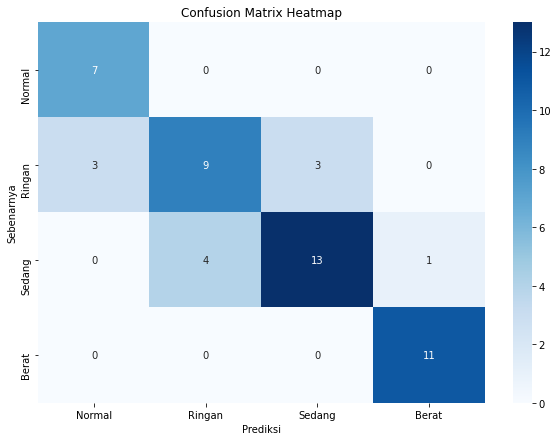

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.93,1.00,0.70,1.00,0.82
Ringan,0.80,0.89,0.60,0.69,0.84,0.64
Sedang,0.84,0.91,0.72,0.81,0.86,0.76
Berat,0.98,0.98,1.00,0.92,1.00,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


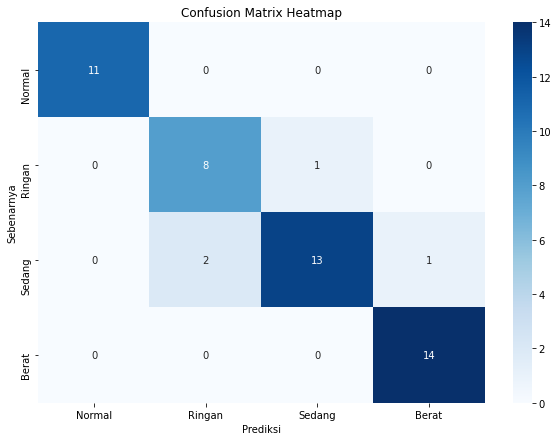

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.00,1.00,1.00,1.00,1.00,1.00
Ringan,0.94,0.95,0.89,0.80,0.98,0.84
Sedang,0.92,0.97,0.81,0.93,0.92,0.87
Berat,0.98,0.97,1.00,0.93,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


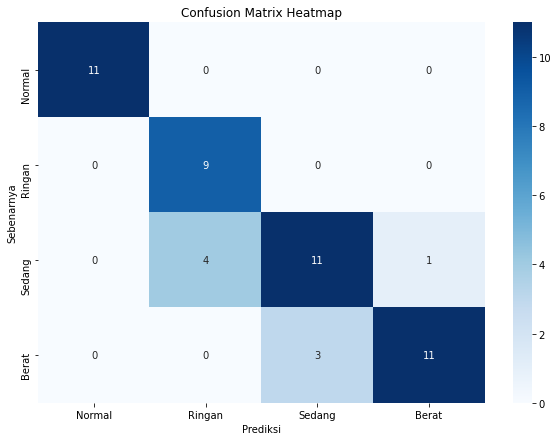

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.00,1.00,1.00,1.00,1.00,1.00
Ringan,0.92,0.90,1.00,0.69,1.00,0.82
Sedang,0.84,0.91,0.69,0.79,0.86,0.73
Berat,0.92,0.97,0.79,0.92,0.92,0.85


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


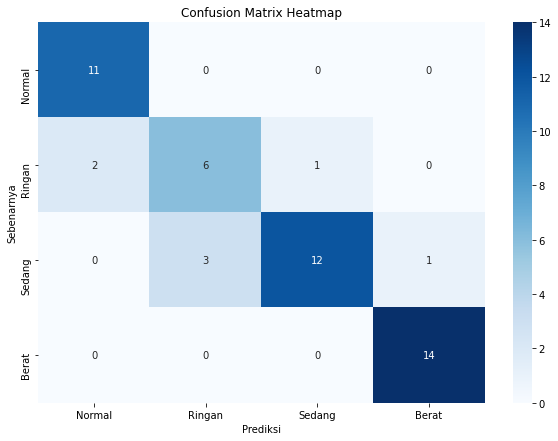

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.95,1.00,0.85,1.00,0.92
Ringan,0.88,0.93,0.67,0.67,0.93,0.67
Sedang,0.90,0.97,0.75,0.92,0.89,0.83
Berat,0.98,0.97,1.00,0.93,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


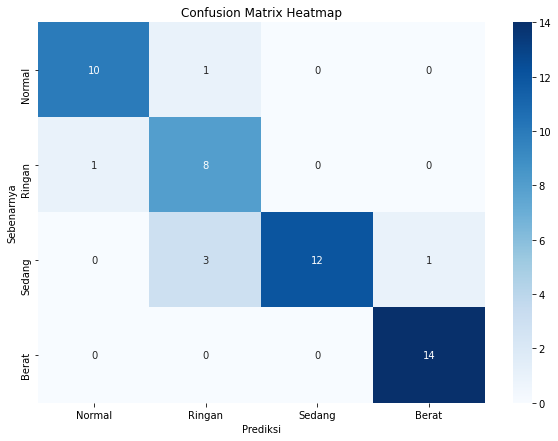

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.91,0.91,0.97,0.91
Ringan,0.90,0.90,0.89,0.67,0.97,0.76
Sedang,0.92,1.00,0.75,1.00,0.89,0.86
Berat,0.98,0.97,1.00,0.93,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


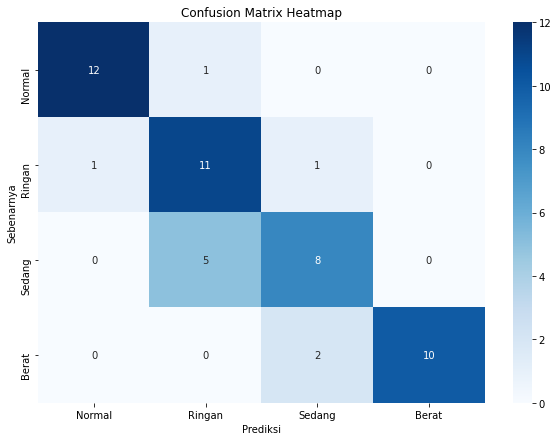

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.92,0.92,0.97,0.92
Ringan,0.84,0.84,0.85,0.65,0.94,0.73
Sedang,0.84,0.92,0.62,0.73,0.88,0.67
Berat,0.96,1.00,0.83,1.00,0.95,0.91


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


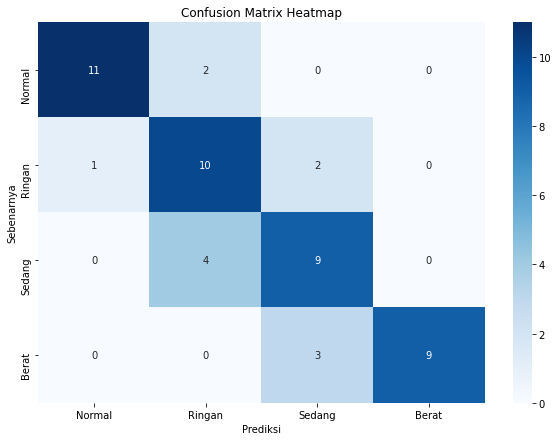

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.97,0.85,0.92,0.95,0.88
Ringan,0.82,0.84,0.77,0.62,0.91,0.69
Sedang,0.82,0.87,0.69,0.64,0.89,0.67
Berat,0.94,1.00,0.75,1.00,0.93,0.86


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


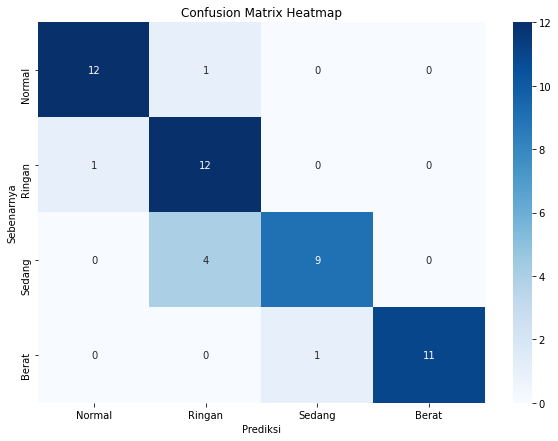

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.92,0.92,0.97,0.92
Ringan,0.88,0.87,0.92,0.71,0.97,0.80
Sedang,0.90,0.97,0.69,0.90,0.90,0.78
Berat,0.98,1.00,0.92,1.00,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


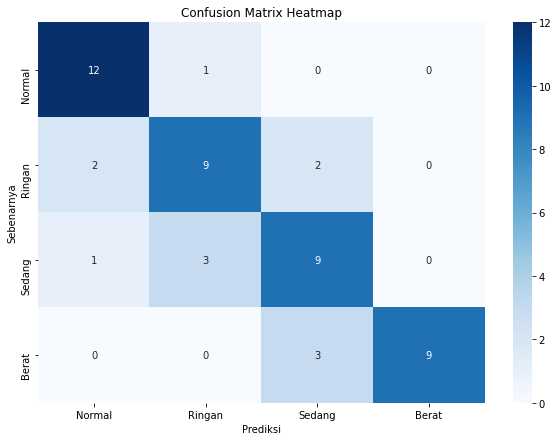

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.92,0.92,0.80,0.97,0.86
Ringan,0.84,0.89,0.69,0.69,0.89,0.69
Sedang,0.82,0.87,0.69,0.64,0.89,0.67
Berat,0.94,1.00,0.75,1.00,0.93,0.86


In [48]:
models_name = ['SVM_ml', 'KNN_ml', 'LogisticRegression_ml', 'RandomForest_ml']
split_results = []

for X_test, y_test in zip(X_tests, y_tests):
    result = validation_model(models_name, X_test, y_test)
    split_results.append(result)
    X_train = X_train.append(X_test)
    y_train = y_train.append(y_test)

    #retrain the model
    for model_name, (model, param_grid) in models_param_grid.items():
        model.fit(X_train, y_train)

        # Save the best model
        dump(model, f"models/{model_name}_model.joblib")
        models_param_grid[model_name] = (model, param_grid)
    

In [49]:
for result in split_results:
    display(result)

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.85,0.90,0.68,0.68,0.90,0.68
KNN_ml,0.87,0.91,0.73,0.74,0.91,0.73
LogisticRegression_ml,0.88,0.92,0.74,0.78,0.92,0.74
RandomForest_ml,0.91,0.94,0.80,0.86,0.94,0.81


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.89,0.93,0.79,0.78,0.92,0.78
KNN_ml,0.90,0.93,0.85,0.81,0.93,0.82
LogisticRegression_ml,0.88,0.92,0.81,0.77,0.92,0.78
RandomForest_ml,0.89,0.93,0.83,0.78,0.92,0.80


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.96,0.97,0.93,0.92,0.97,0.92
KNN_ml,0.92,0.95,0.87,0.85,0.95,0.85
LogisticRegression_ml,0.93,0.95,0.85,0.84,0.95,0.84
RandomForest_ml,0.94,0.96,0.89,0.88,0.96,0.87


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.90,0.93,0.80,0.82,0.94,0.81
KNN_ml,0.88,0.92,0.76,0.80,0.92,0.77
LogisticRegression_ml,0.93,0.95,0.86,0.88,0.96,0.87
RandomForest_ml,0.88,0.92,0.76,0.78,0.92,0.77


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


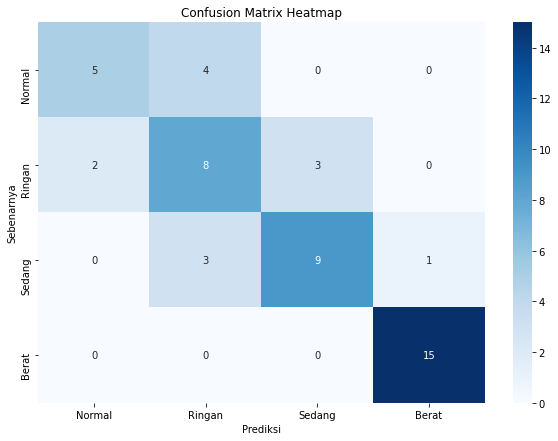

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.88,0.95,0.56,0.71,0.91,0.63
Ringan,0.76,0.81,0.62,0.53,0.86,0.57
Sedang,0.86,0.92,0.69,0.75,0.89,0.72
Berat,0.98,0.97,1.00,0.94,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


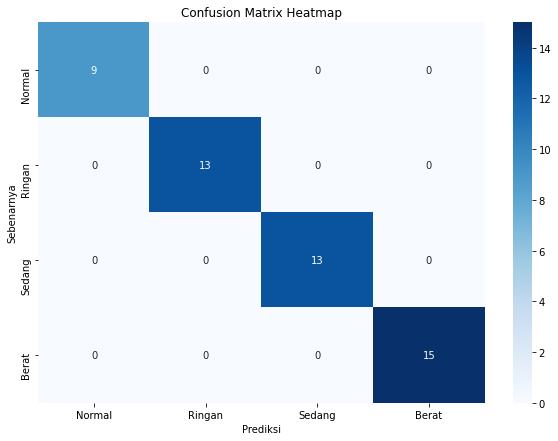

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


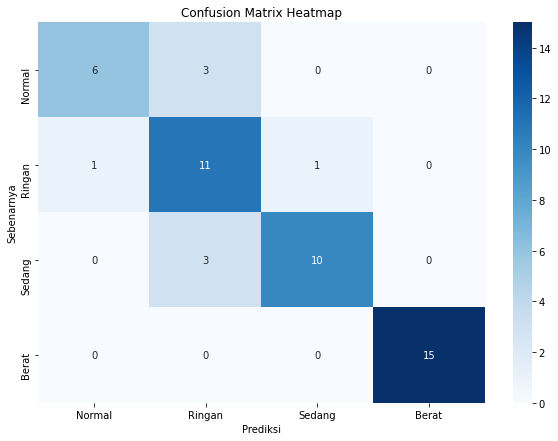

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.92,0.98,0.67,0.86,0.93,0.75
Ringan,0.84,0.84,0.85,0.65,0.94,0.73
Sedang,0.92,0.97,0.77,0.91,0.92,0.83
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


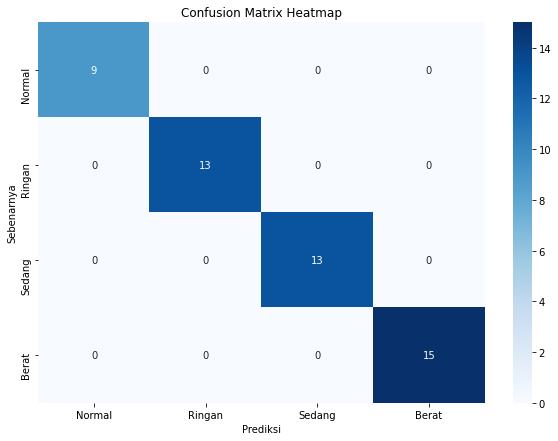

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


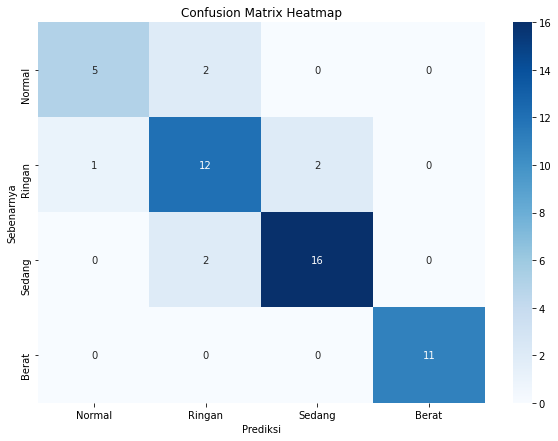

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.94,0.98,0.71,0.83,0.96,0.77
Ringan,0.86,0.89,0.80,0.75,0.91,0.77
Sedang,0.92,0.94,0.89,0.89,0.94,0.89
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


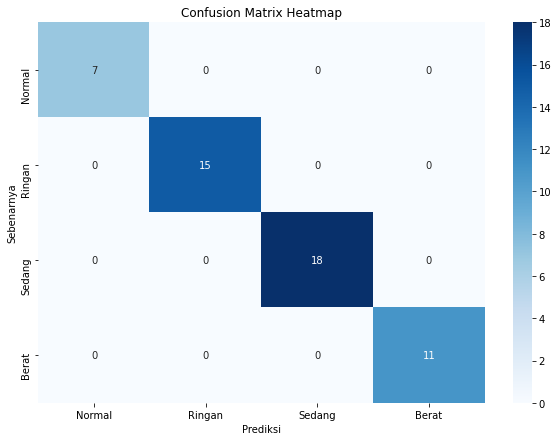

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


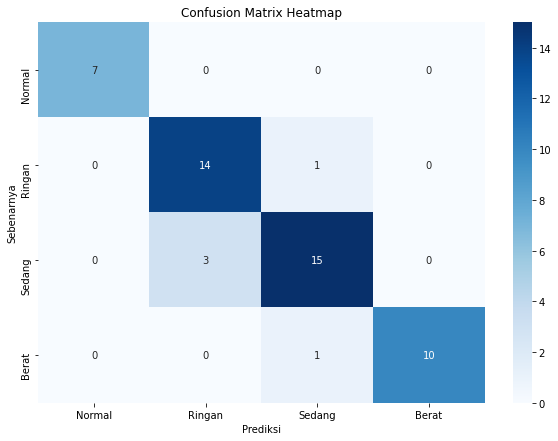

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.00,1.00,1.00,1.00,1.00,1.00
Ringan,0.92,0.92,0.93,0.82,0.97,0.87
Sedang,0.90,0.94,0.83,0.88,0.91,0.86
Berat,0.98,1.00,0.91,1.00,0.98,0.95


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


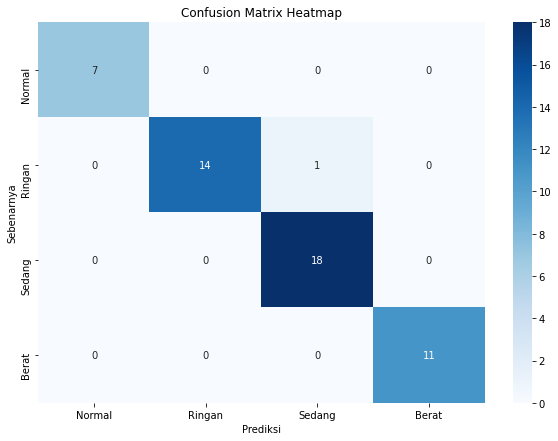

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.00,1.00,1.00,1.00,1.00,1.00
Ringan,0.98,1.00,0.93,1.00,0.97,0.97
Sedang,0.98,0.97,1.00,0.95,1.00,0.97
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


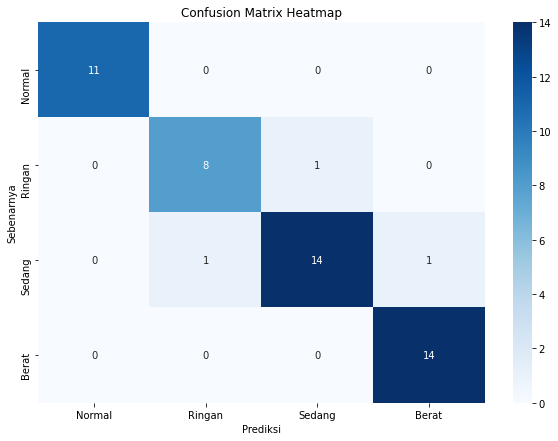

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.00,1.00,1.00,1.00,1.00,1.00
Ringan,0.96,0.98,0.89,0.89,0.98,0.89
Sedang,0.94,0.97,0.88,0.93,0.94,0.90
Berat,0.98,0.97,1.00,0.93,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


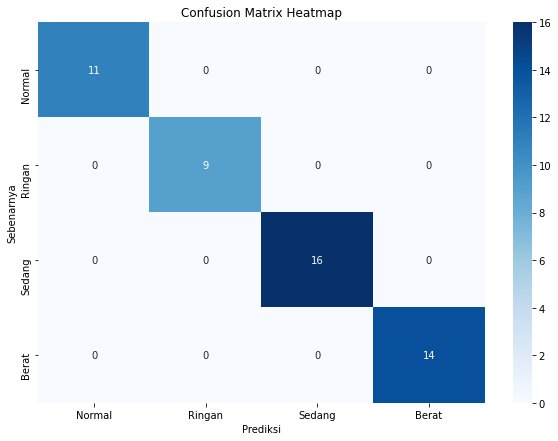

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


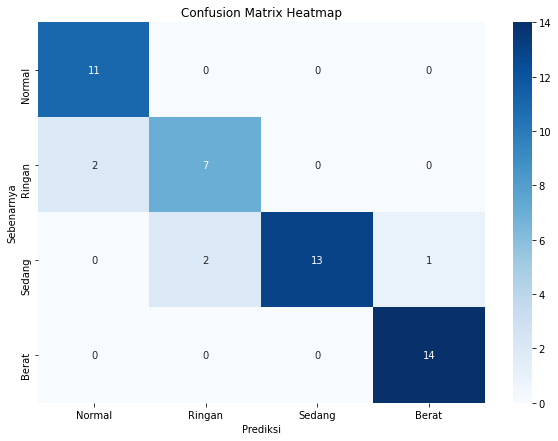

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.95,1.00,0.85,1.00,0.92
Ringan,0.92,0.95,0.78,0.78,0.95,0.78
Sedang,0.94,1.00,0.81,1.00,0.92,0.90
Berat,0.98,0.97,1.00,0.93,1.00,0.97


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


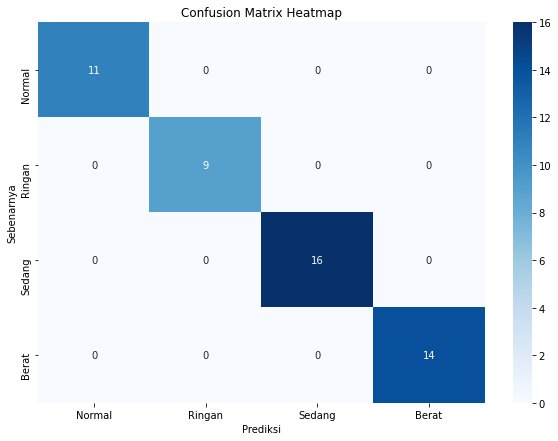

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_ml_model.joblib


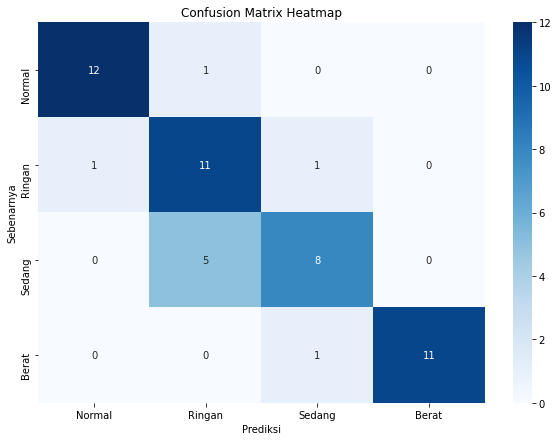

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.96,0.97,0.92,0.92,0.97,0.92
Ringan,0.84,0.84,0.85,0.65,0.94,0.73
Sedang,0.86,0.95,0.62,0.80,0.88,0.70
Berat,0.98,1.00,0.92,1.00,0.98,0.96


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_ml_model.joblib


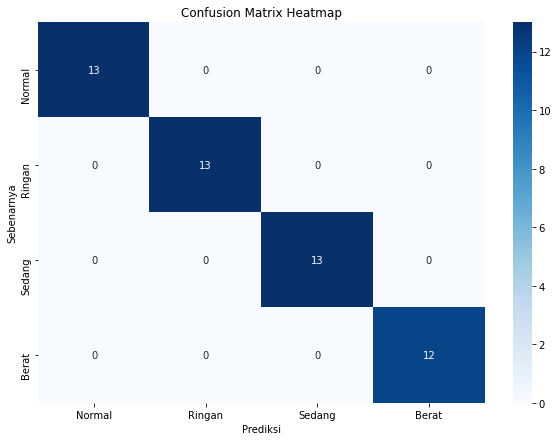

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_ml_model.joblib


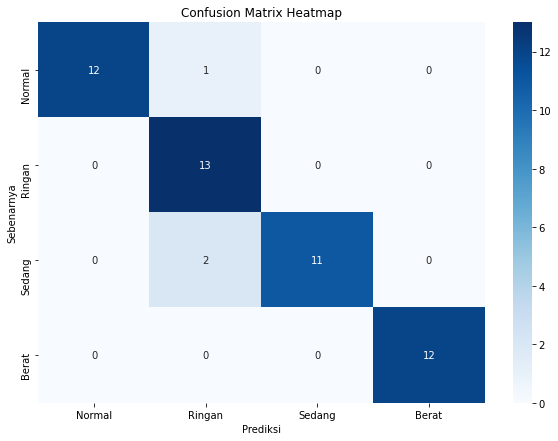

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,0.98,1.00,0.92,1.00,0.97,0.96
Ringan,0.94,0.92,1.00,0.81,1.00,0.90
Sedang,0.96,1.00,0.85,1.00,0.95,0.92
Berat,1.00,1.00,1.00,1.00,1.00,1.00


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_ml_model.joblib


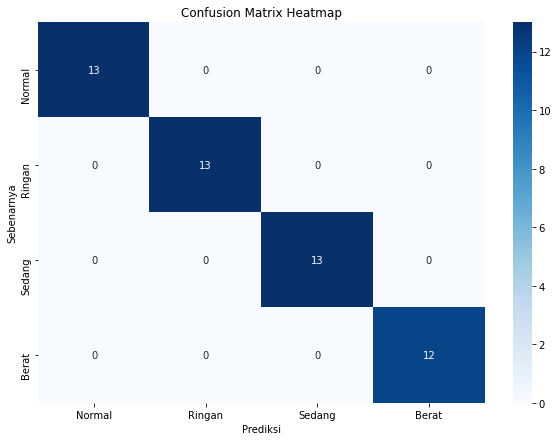

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
Normal,1.0,1.0,1.0,1.0,1.0,1.0
Ringan,1.0,1.0,1.0,1.0,1.0,1.0
Sedang,1.0,1.0,1.0,1.0,1.0,1.0
Berat,1.0,1.0,1.0,1.0,1.0,1.0


In [50]:
models_name = ['SVM_ml', 'KNN_ml', 'LogisticRegression_ml', 'RandomForest_ml']
split_results2 = []

for X_test, y_test in zip(X_tests, y_tests):
    result = validation_model(models_name, X_test, y_test)
    split_results2.append(result)

In [51]:
for result in split_results2:
    display(result)

,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.87,0.91,0.72,0.73,0.91,0.72
KNN_ml,1.00,1.00,1.00,1.00,1.00,1.00
LogisticRegression_ml,0.92,0.95,0.82,0.85,0.95,0.83
RandomForest_ml,1.00,1.00,1.00,1.00,1.00,1.00


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.93,0.95,0.85,0.87,0.95,0.86
KNN_ml,1.00,1.00,1.00,1.00,1.00,1.00
LogisticRegression_ml,0.95,0.96,0.92,0.93,0.96,0.92
RandomForest_ml,0.99,0.99,0.98,0.99,0.99,0.98


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.97,0.98,0.94,0.94,0.98,0.94
KNN_ml,1.00,1.00,1.00,1.00,1.00,1.00
LogisticRegression_ml,0.95,0.97,0.90,0.89,0.97,0.89
RandomForest_ml,1.00,1.00,1.00,1.00,1.00,1.00


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F1 Score
SVM_ml,0.91,0.94,0.83,0.84,0.94,0.83
KNN_ml,1.00,1.00,1.00,1.00,1.00,1.00
LogisticRegression_ml,0.97,0.98,0.94,0.95,0.98,0.94
RandomForest_ml,1.00,1.00,1.00,1.00,1.00,1.00


In [31]:
y_train.value_counts()

Ringan    85
Normal    82
Berat     79
Sedang    76
Name: Label (OSA), dtype: int64

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train.replace({'Normal': 0, 'Ringan': 1, 'Sedang': 2, 'Berat': 3}), epochs=50, batch_size=5, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test.replace({'Normal': 0, 'Ringan': 1, 'Sedang': 2, 'Berat': 3}))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

model.predict(X_train.iloc[6])


Epoch 1/50
52/52 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss: 0.0000e+00 - val_accuracy: 0.2462
Epoch 2/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss: 0.0000e+00 - val_accuracy: 0.2462
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss: 0.0000e+00 - val_accuracy: 0.2462
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss: 0.0000e+00 - val_accuracy: 0.2462
Epoch 5/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss: 0.0000e+00 - val_accuracy: 0.2462
Epoch 6/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss: 0.0000e+00 - val_accuracy: 0.2462
Epoch 7/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2685 - val_loss

ValueError: in user code:

    File "c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_16' (type Sequential).
    
    Input 0 of layer "dense_47" is incompatible with the layer: expected axis -1 of input shape to have value 26, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_16' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None


## Others

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = one_hot_encoded_data.drop(columns=['Label (OSA)'])
y = one_hot_encoded_data['Label (OSA)']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grids for each model (adjust parameters and values as needed)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15]
}

param_grid_knn = {
    'n_neighbors': range(1, 21)  # Test odd numbers for KNN
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Define and train models with GridSearchCV and cross-validation
models = {}

# SVM with GridSearchCV
models["SVM"] = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=5)
models["SVM"].fit(X_train, y_train)

# Random Forest with GridSearchCV
models["Random Forest"] = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='accuracy', cv=5)
models["Random Forest"].fit(X_train, y_train)

# KNN with GridSearchCV
models["KNN"] = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5)
models["KNN"].fit(X_train, y_train)

# Logistic Regression with GridSearchCV
models["Logistic Regression"] = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='accuracy', cv=5)
models["Logistic Regression"].fit(X_train, y_train)

# Get the best models and their parameters
for model_name, model in models.items():
    best_model = model.best_estimator_
    best_params = model.best_params_
    print(f"{model_name} Best Parameters: {best_params}")

# Evaluate models on the testing set using the best models from GridSearchCV
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SVM Best Parameters: {'C': 10, 'kernel': 'linear'}
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 200}
KNN Best Parameters: {'n_neighbors': 4}
Logistic Regression Best Parameters: {'C': 1}
SVM Accuracy: 0.8595
Random Forest Accuracy: 0.8017
KNN Accuracy: 0.6860
Logistic Regression Accuracy: 0.8017


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#result dataframe of stastical analysis
labels = ['Semua', 'Normal', 'Ringan', 'Sedang', 'Berat']

# Create an empty DataFrame
table_stats = pd.DataFrame(index=numerical_column, columns=labels, dtype=int)

# Fill with default value 0
table_stats.fillna(0, inplace=True)

for label in labels:
  for column in numerical_column:
    df_filtered = df if label == 'Semua' else df.where(df['Label (OSA)'] == label)

    mean = df_filtered[column].mean().round(2)
    std = df_filtered[column].std().round(2)

    table_stats[label][column] = f"{mean} ± {std}"


table_stats

<ipython-input-63-98a93cb00f07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_stats[label][column] = f"{mean} ± {std}"
<ipython-input-63-98a93cb00f07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_stats[label][column] = f"{mean} ± {std}"
<ipython-input-63-98a93cb00f07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_stats[label][column] = f"{mean} ± {std}"
<ipython-input-63-98a93cb00f07>:17: SettingWithCopyW

,Semua,Normal,Ringan,Sedang,Berat
Usia (thn),44.77 ± 17.66,40.85 ± 18.77,43.68 ± 17.19,43.1 ± 16.37,51.5 ± 16.61
Tinggi (cm),164.54 ± 12.52,163.5 ± 15.0,164.02 ± 13.48,163.99 ± 11.18,166.66 ± 9.62
Berat (Kg),80.09 ± 22.73,63.75 ± 16.43,79.32 ± 20.28,80.52 ± 19.22,96.97 ± 21.8
BMI (Kg/m2),29.42 ± 10.17,23.48 ± 4.31,30.06 ± 15.84,29.49 ± 5.5,34.7 ± 7.13
Lingkar Perut (cm),95.72 ± 18.26,80.22 ± 10.58,93.53 ± 14.28,97.59 ± 14.15,111.73 ± 17.88
Lingkar Leher (cm),36.52 ± 4.44,33.15 ± 3.21,35.61 ± 3.24,36.89 ± 3.61,40.5 ± 4.17
Terbangun (berapa kali): buang air kecil,0.69 ± 0.81,0.2 ± 0.49,0.44 ± 0.59,0.71 ± 0.8,1.43 ± 0.76
Terbangun (berapa kali): tersedak,1.76 ± 1.8,0.02 ± 0.14,1.17 ± 1.13,1.85 ± 1.23,4.02 ± 1.3
Durasi tidur (jam),6.17 ± 0.68,6.31 ± 0.81,6.09 ± 0.55,6.13 ± 0.58,6.17 ± 0.73


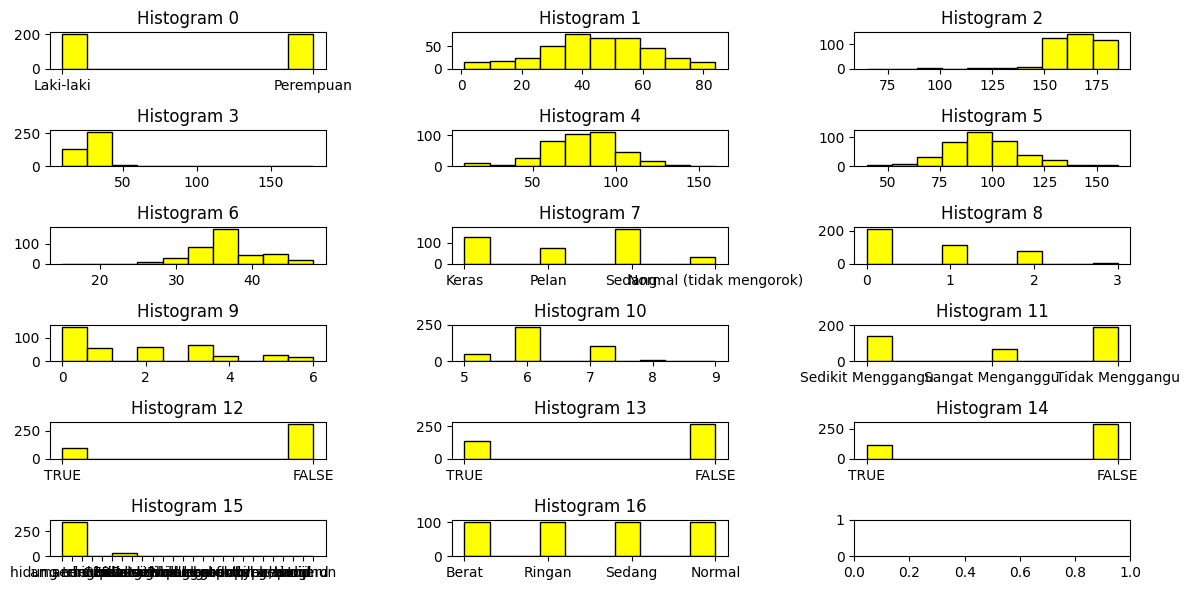

In [ ]:
import matplotlib.pyplot as plt

# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 6))

for i, column in enumerate(df):

  axes.flat[i].hist(df[column], color='Yellow', edgecolor='black')
  axes.flat[i].set_title(f'Histogram {i}')


# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

   Jenis Kelamin  Usia (thn)  Tinggi (cm)  Berat (Kg)  BMI (Kg/m2)  \
0      Laki-laki        59.0        176.0       110.0    35.511364   
1      Laki-laki        39.0        167.0       104.0    37.290688   
2      Laki-laki        38.0        180.0        96.0    29.629630   
3      Laki-laki        48.0        170.0        95.0    32.871972   
4      Laki-laki        53.0        163.0        93.0    35.003199   
..           ...         ...          ...         ...          ...   
82     Perempuan        52.0        162.0       122.0    46.486816   
83     Perempuan        39.0        156.0       103.0    42.324129   
84     Laki-laki        48.0        176.0       143.0    46.164773   
85     Perempuan        53.0        159.0        90.0    35.599858   
86     Perempuan        59.0        164.0       105.0    39.039262   

    Lingkar Perut (cm)  Lingkar Leher (cm) Suara Mengorok  \
0                130.0                39.0          Keras   
1                120.0               

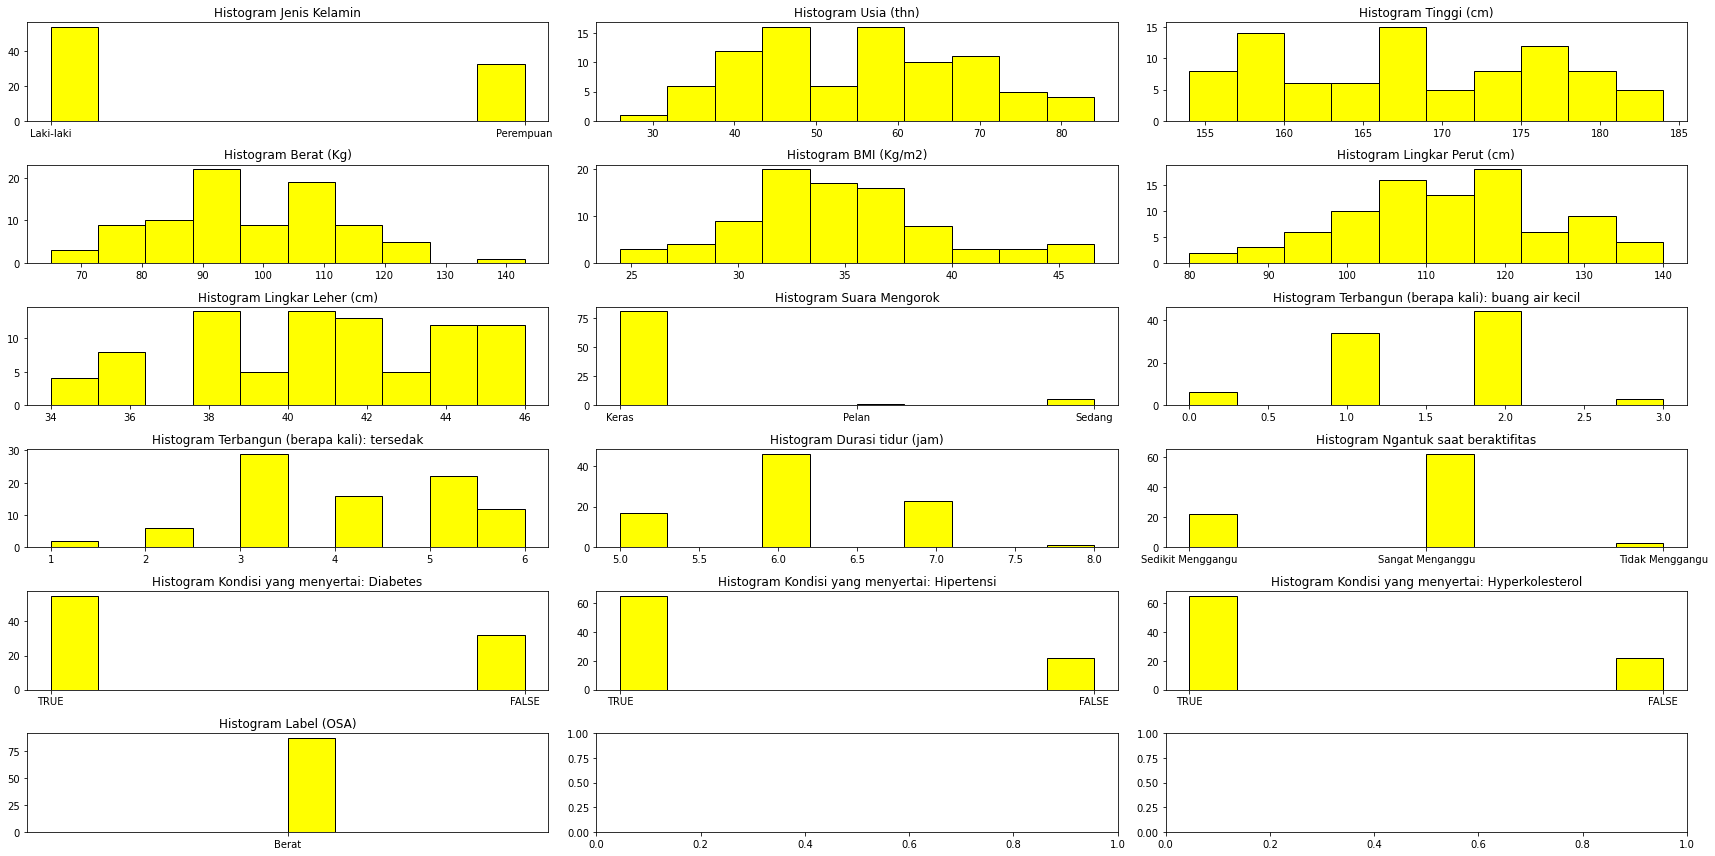

In [22]:
import matplotlib.pyplot as plt

df_prep = df.copy()
df_prep = remove_outliers_by_class(df_prep, 'Label (OSA)')
df_prep = df_prep[df_prep['Label (OSA)'] == 'Berat']
# df_prep = numerical_prep(df_prep, numerical_column, norm_type='z')
# df_prep = categorical_prep(df_prep)

# final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])
final_prep = df_prep.drop(columns=['Kondisi yang menyertai: Lainnya'])

print(final_prep)
print(final_prep.columns)

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']


# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(24, 12))

for i, column in enumerate(final_prep):

  axes.flat[i].hist(final_prep[column], color='Yellow', edgecolor='black')
  axes.flat[i].set_title(f'Histogram {column}')


# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
df['Label (OSA)'].value_counts().values

array([102, 101, 100, 100])

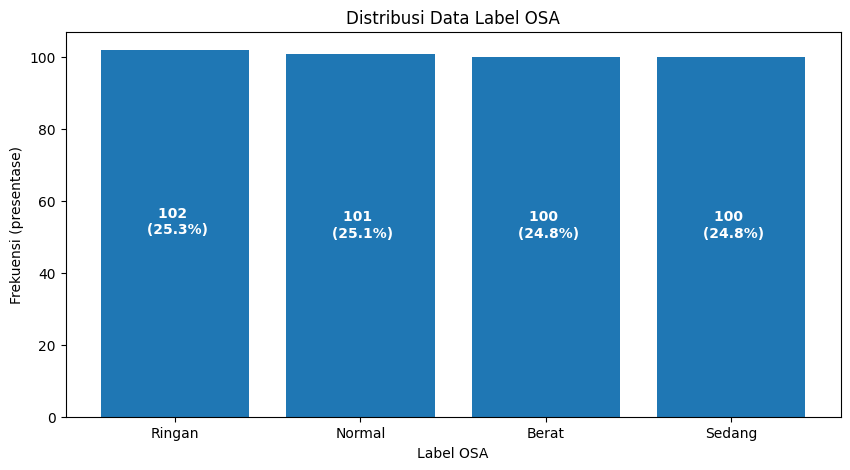

In [ ]:
# importing library
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, f'{y[i]} \n ({(y[i]*100/sum(y)).round(1)}%)', ha = 'center', color='white', weight='bold')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = df['Label (OSA)'].value_counts().index

    y = df['Label (OSA)'].value_counts().values

    # setting figure size by using figure() function
    plt.figure(figsize = (10,5))

    # making the bar chart on the data
    plt.bar(x, y)

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Distribusi Data Label OSA")

    # giving X and Y labels
    plt.xlabel("Label OSA")
    plt.ylabel("Frekuensi (presentase)")

    # visualizing the plot
    plt.show()

In [ ]:
y_train.value_counts()

Normal    74
Ringan    69
Berat     69
Sedang    69
Name: Label (OSA), dtype: int64

### With z-score normalization

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data_label1 = final_prep[final_prep['Label (OSA)'] == 'Normal'] 
data_label2 = final_prep[final_prep['Label (OSA)'] == 'Ringan'] 
data_label3 = final_prep[final_prep['Label (OSA)'] == 'Sedang'] 
data_label4 = final_prep[final_prep['Label (OSA)'] == 'Berat'] 

# Define colors
colors = ['blue', 'green', 'red', 'purple']  # Adjust as needed

# Create the scatter plot
plt.scatter(data_label1, data_label2, label='Label 1', c=colors[0])
plt.scatter(data_label1, data_label3, label='Label 2', c=colors[1])
plt.scatter(data_label1, data_label4, label='Label 3', c=colors[2])
plt.scatter(data_label1, data_label4, label='Label 4', c=colors[3])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Distribution by Label')

# Add legend
plt.legend()

# Display the plot
plt.show()
